# LIBRARIES

In [1]:
#Libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


#Suppress the specific FutureWarning from pandas
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# DATASET

In [2]:
#Load the CSV file
df = pd.read_csv('data.csv')

#Specify the columns to drop
columns_to_drop = ['Timestamp',  'Permissions']

#Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [3]:
df.head(3)

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect


# INSPECTING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           735 non-null    float64
 1   Primary streaming service     735 non-null    object 
 2   Hours per day                 736 non-null    float64
 3   While working                 733 non-null    object 
 4   Instrumentalist               732 non-null    object 
 5   Composer                      735 non-null    object 
 6   Fav genre                     736 non-null    object 
 7   Exploratory                   736 non-null    object 
 8   Foreign languages             732 non-null    object 
 9   BPM                           629 non-null    float64
 10  Frequency [Classical]         736 non-null    object 
 11  Frequency [Country]           736 non-null    object 
 12  Frequency [EDM]               736 non-null    object 
 13  Frequ

In [5]:
#Duplicates
df.duplicated().sum()

0

In [6]:
#Garbages
object_cols = df.select_dtypes(include = 'object').columns

for col in object_cols:
    print(col)
    print(df[col].unique())
    print("*" * 20 )

Primary streaming service
['Spotify' 'Pandora' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service' nan]
********************
While working
['Yes' 'No' nan]
********************
Instrumentalist
['Yes' 'No' nan]
********************
Composer
['Yes' 'No' nan]
********************
Fav genre
['Latin' 'Rock' 'Video game music' 'Jazz' 'R&B' 'K pop' 'Country' 'EDM'
 'Hip hop' 'Pop' 'Rap' 'Classical' 'Metal' 'Folk' 'Lofi' 'Gospel']
********************
Exploratory
['Yes' 'No']
********************
Foreign languages
['Yes' 'No' nan]
********************
Frequency [Classical]
['Rarely' 'Sometimes' 'Never' 'Very frequently']
********************
Frequency [Country]
['Never' 'Sometimes' 'Very frequently' 'Rarely']
********************
Frequency [EDM]
['Rarely' 'Never' 'Very frequently' 'Sometimes']
********************
Frequency [Folk]
['Never' 'Rarely' 'Sometimes' 'Very frequently']
********************
Frequency [Gospel]
['Never' 'Sometimes' 'Rarely' 'Very

In [7]:
#Missing values
df.isnull().sum()

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [8]:
#Imputing missing values numeric
df["Age"] = df["Age"].fillna(df['Age'].median())
df["BPM"] =  df["BPM"].fillna(df['BPM'].median())

In [9]:
#Imputing Missing Values in Categorical Columns
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode().iloc[0])

**Filling missing values in object columns with first mode**

In [10]:
try:
    for col in df.select_dtypes(include='category').columns:
        df[col] = df[col].fillna(df[col].mode().iloc[0]) 

except Exception as e:
    print("Error:", e) 

else:
    print("No missing values in categorical columns")

No missing values in categorical columns


## CHANGING DATA TYPES

In [11]:
df["Age"] = df["Age"].astype('int64')

In [12]:
df["BPM"] = df["BPM"].astype('int64')

Anxiety, Depression, Insomnia and OCD should be categorical Variables

In [13]:
#Changing the Datatypes of Anxiety, Depression, Insomnia and OCD
cols_to_covert = ["Anxiety", 'Depression', 'Insomnia', 'OCD']
df[cols_to_covert] = df[cols_to_covert].astype('int64')
df[cols_to_covert] = df[cols_to_covert].astype('int64')

In [14]:
#Changing object columns to category
obj_cols = df.select_dtypes(include = 'object').columns
df[obj_cols] = df[obj_cols].astype('object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           736 non-null    int64  
 1   Primary streaming service     736 non-null    object 
 2   Hours per day                 736 non-null    float64
 3   While working                 736 non-null    object 
 4   Instrumentalist               736 non-null    object 
 5   Composer                      736 non-null    object 
 6   Fav genre                     736 non-null    object 
 7   Exploratory                   736 non-null    object 
 8   Foreign languages             736 non-null    object 
 9   BPM                           736 non-null    int64  
 10  Frequency [Classical]         736 non-null    object 
 11  Frequency [Country]           736 non-null    object 
 12  Frequency [EDM]               736 non-null    object 
 13  Frequ

# EDA

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,736.0,2.520109e+01,1.204776e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,736.0,1.358818e+06,3.686048e+07,0.0,105.0,120.0,140.0,999999999.0
Anxiety,736.0,5.836957e+00,2.792710e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.794837e+00,3.029564e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.737772e+00,3.088797e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.635870e+00,2.840047e+00,0.0,0.0,2.0,5.0,10.0


In [17]:
df.describe(include = 'object').T

,count,unique,top,freq
Primary streaming service,736,6,Spotify,459
While working,736,2,Yes,582
Instrumentalist,736,2,No,501
Composer,736,2,No,610
Fav genre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,736,2,Yes,408
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343
Frequency [EDM],736,4,Never,307


## Cheking for Outliers

In [18]:
#plt.style.use('dark_background')

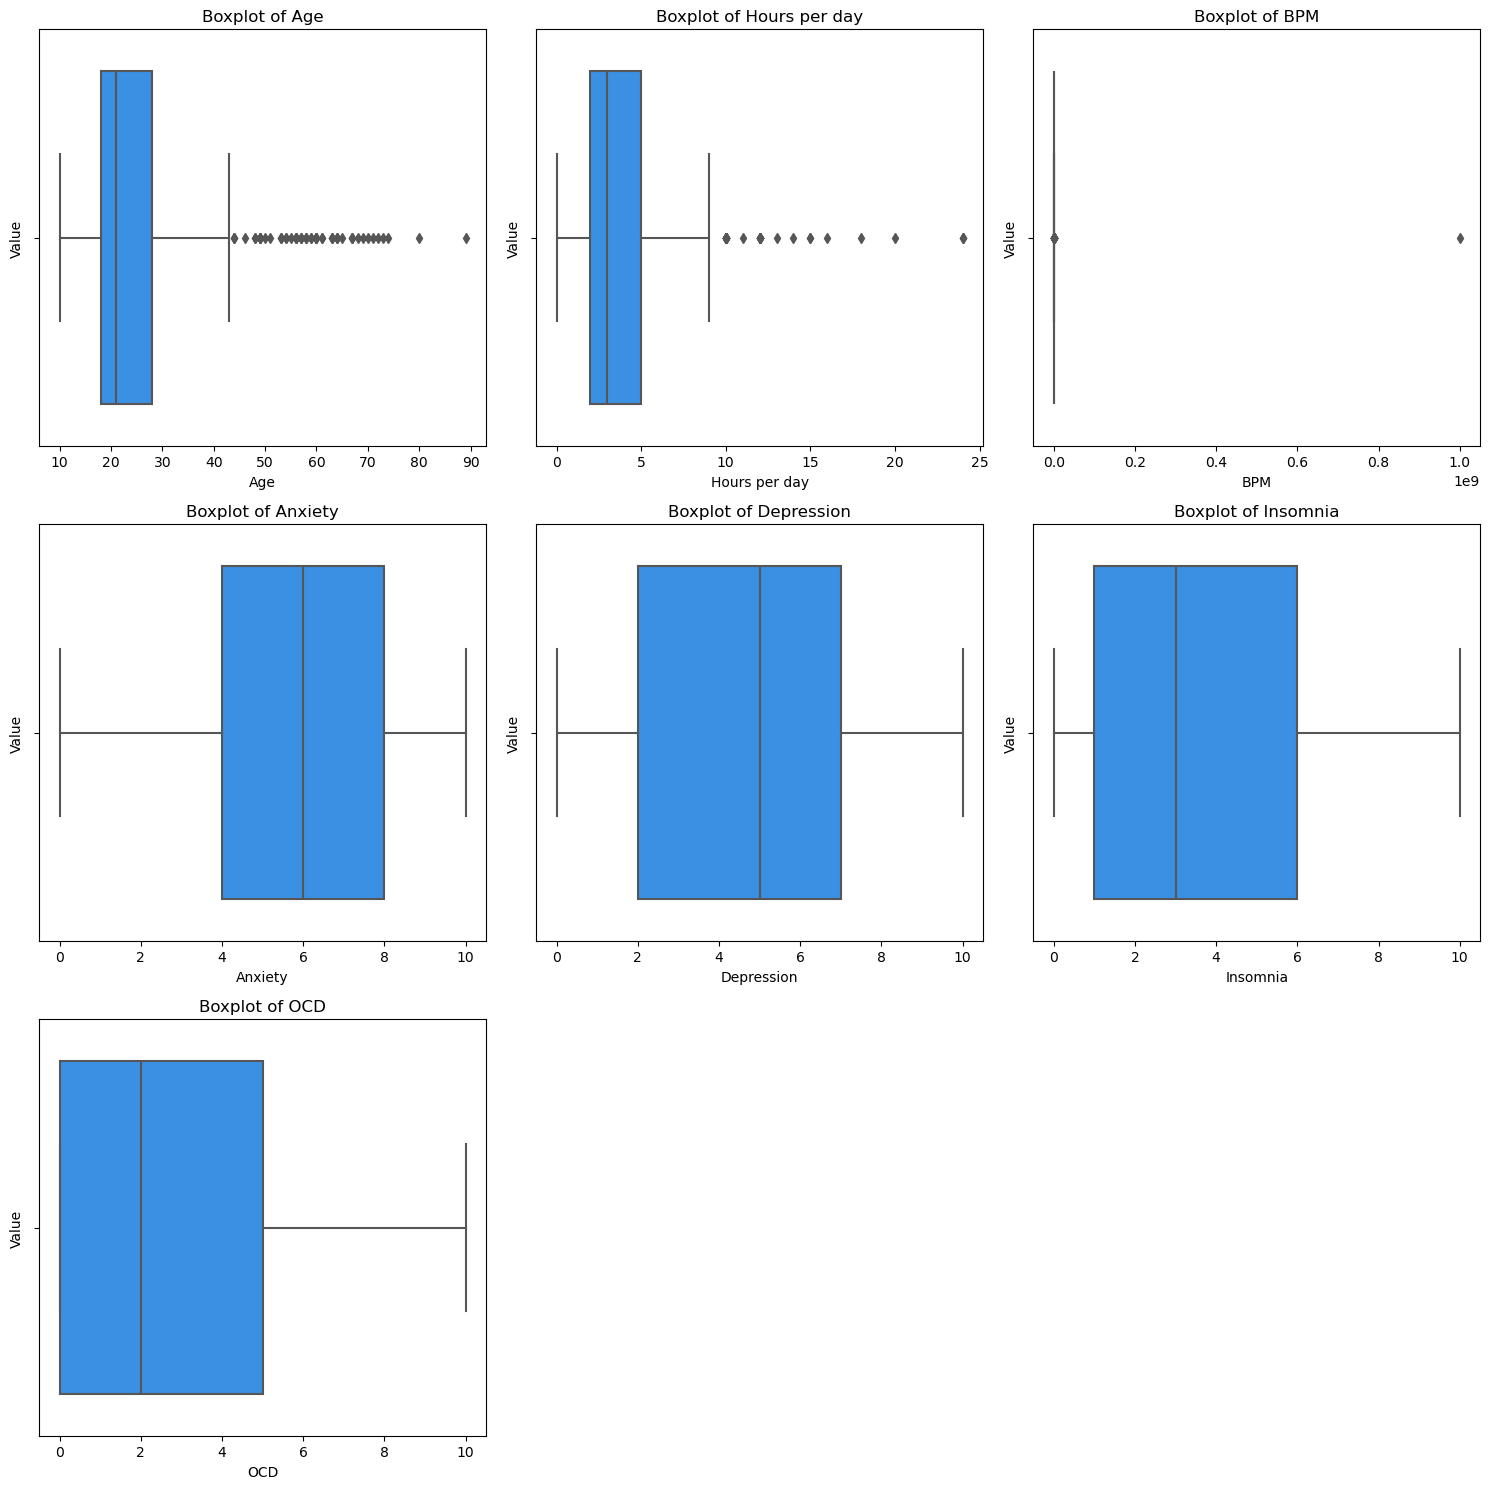

In [19]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

#Define the layout for subplots
num_plots = len(numeric_cols)
num_cols_per_row = 3
num_rows = (num_plots // num_cols_per_row) + (num_plots % num_cols_per_row > 0)

#Create subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5*num_rows))

#Flatten axes for easier iteration
axes = axes.flatten()

#Plot each numeric column as a boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="dodgerblue")
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Value")

#Remove any extra subplots that are not used
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Handling Outliers

In [20]:
def find_outliers(col):
    q1,q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(lower_bound, upper_bound)

In [21]:
find_outliers('BPM')

52.5 192.5


In [22]:
find_outliers('Age')

3.0 43.0


In [23]:
find_outliers('Hours per day')

-2.5 9.5



##### **Capping the Age Variable**
To ensure the relevance and accuracy of our study, we have capped the age variable within the range of 5 to 75 years. This range is chosen based on the following considerations:
- **Minimum Age**: Mental health conditions typically emerge as early as age 5.
- **Maximum Age**: With the average global life expectancy being around 71 years, we set the upper limit slightly higher to 75 years to generalize our findings effectively.
  
##### **Removing Extreme Values in BPM Columns**
To maintain the integrity and reliability of our dataset, we have removed extreme values in the Beats Per Minute (BPM) columns. This step is crucial to eliminate anomalies that could skew our analysis and to focus on realistic and clinically relevant data points.

##### **Removing Outliers in Listening Times**
Outliers in listening times can significantly distort our results and lead to incorrect conclusions. Therefore, we have identified and removed these outliers to ensure that our analysis reflects typical listening behaviors and provides meaningful insights into the impact of music therapy on mental health conditions.
onditions.


In [24]:
#Apply multiple filtering conditions to the DataFrame
df_filtered = df[(df['Age'] >= 5) & (df['Age'] <= 75) &
                 (df['BPM'] >= 40) & (df['BPM'] <= 300) &
                 (df['Hours per day'] >= 0) & (df['Hours per day'] <= 9.5)].copy()

## Correlation

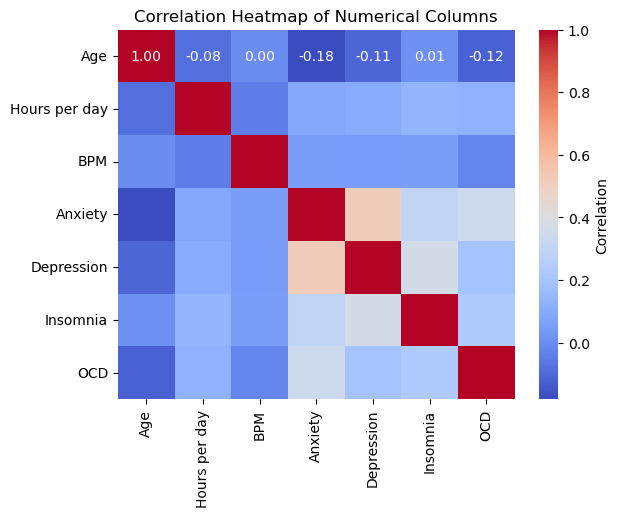

                    Age  Hours per day       BPM   Anxiety  Depression  \
Age            1.000000      -0.084476  0.002790 -0.180619   -0.111387   
Hours per day -0.084476       1.000000 -0.045811  0.084172    0.096096   
BPM            0.002790      -0.045811  1.000000  0.051360    0.046265   
Anxiety       -0.180619       0.084172  0.051360  1.000000    0.511231   
Depression    -0.111387       0.096096  0.046265  0.511231    1.000000   
Insomnia       0.010795       0.135312  0.050131  0.298232    0.365516   
OCD           -0.120907       0.120472 -0.020279  0.343591    0.190053   

               Insomnia       OCD  
Age            0.010795 -0.120907  
Hours per day  0.135312  0.120472  
BPM            0.050131 -0.020279  
Anxiety        0.298232  0.343591  
Depression     0.365516  0.190053  
Insomnia       1.000000  0.233492  
OCD            0.233492  1.000000  


In [25]:
#Compute the correlation matrix
corr_matrix = df_filtered.select_dtypes(include = ['int64', 'float64']).corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

print(corr_matrix)

No significant patterns

In [26]:
selected_columns = ['Anxiety', 'Depression', 'OCD', 'Insomnia']
corr_matrix_conditions = df_filtered[selected_columns].corr()

print("Correlation Matrix between Anxiety, Depression, OCD, and Insomnia:")
print("*" * 80)
print(corr_matrix_conditions)

Correlation Matrix between Anxiety, Depression, OCD, and Insomnia:
********************************************************************************
             Anxiety  Depression       OCD  Insomnia
Anxiety     1.000000    0.511231  0.343591  0.298232
Depression  0.511231    1.000000  0.190053  0.365516
OCD         0.343591    0.190053  1.000000  0.233492
Insomnia    0.298232    0.365516  0.233492  1.000000


Small Correlation between anxiety and depression

## Distributions_Numeric Variables

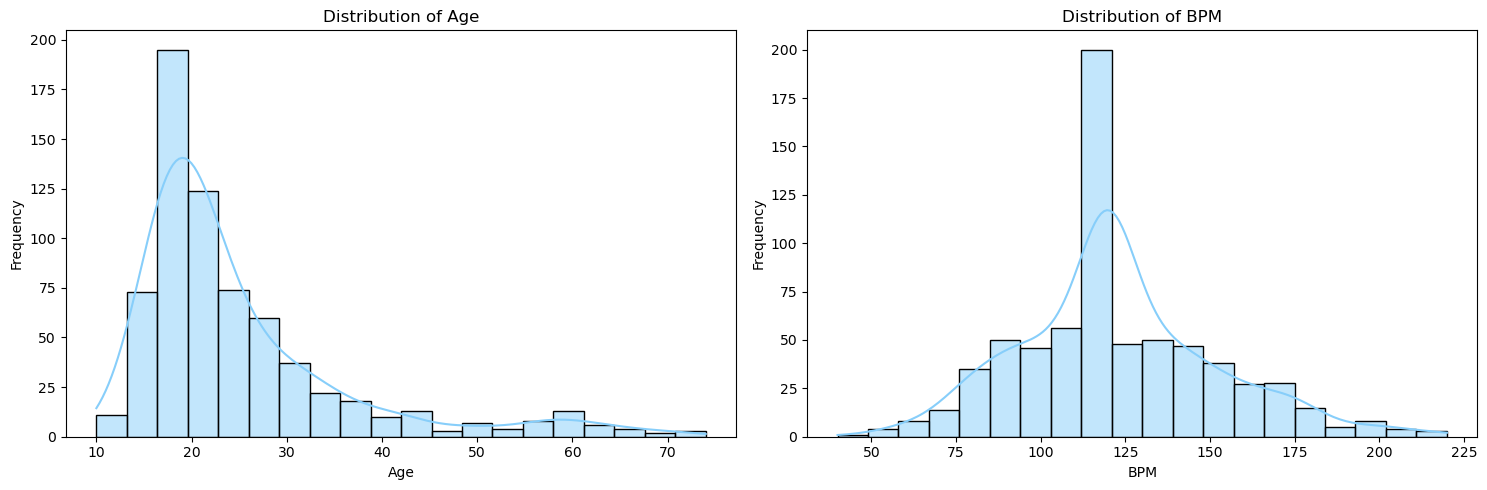

In [27]:
cols = ['Age', 'BPM']

#Define the layout for subplots
num_plots = len(cols)
num_cols_per_row = 2
num_rows = (num_plots // num_cols_per_row) + (num_plots % num_cols_per_row > 0)

#Create subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5*num_rows))

#Flatten axes for easier iteration
axes = axes.flatten()

#Plot each numeric column as a histogram
for i, col in enumerate(cols):
    sns.histplot(df_filtered[col], kde=True, bins=20, color="lightskyblue", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

#Remove any extra subplots that are not used
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Age and Hours per day are Skewed to the left. BPM seems to follow a normal distribution.

## Listening Habits

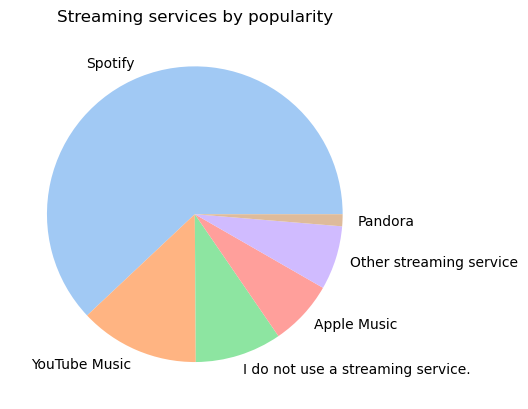

In [28]:
#Streaming platform
services = df_filtered['Primary streaming service'].value_counts()
services.plot(kind='pie', colors = sns.color_palette('pastel')[0:13])

plt.title('Streaming services by popularity')
plt.ylabel("")
plt.show()

Spotify is the most used streamin service while you tube is the second.Pandora is the least used serveice

Spotify and Apple Music is used by mostly young respondats. Although Pandora is the least used service, It is used by perople who are aged about 15 to 70.

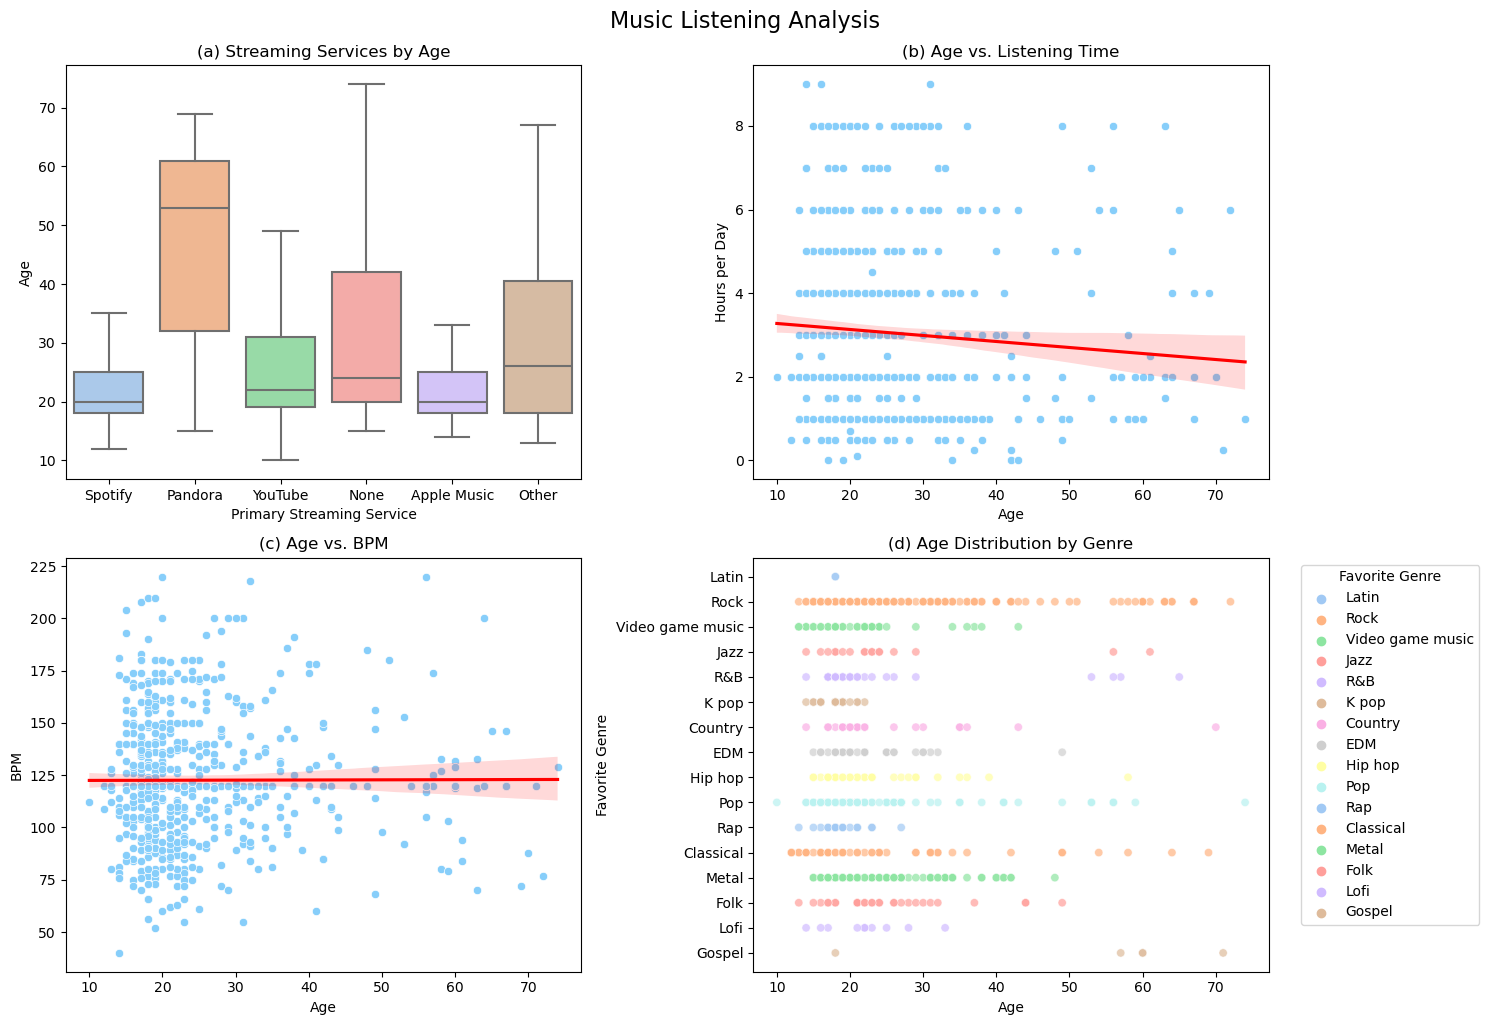

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

#Replace specific values in 'Primary streaming service' column
df_filtered.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                    ['Other', 'None', 'YouTube'], inplace=True)

#Define the layout for subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

#Subplot (a): Boxplot - Streaming services by Age
sns.boxplot(data=df_filtered, x="Primary streaming service", y="Age",
            showfliers=False, palette=sns.color_palette('pastel')[0:13], ax=axes[0, 0])
axes[0, 0].set_title('(a) Streaming Services by Age')
axes[0, 0].set_xlabel('Primary Streaming Service')
axes[0, 0].set_ylabel('Age')

#Subplot (b): Scatterplot - Age vs. Listening Time with trend line
sns.scatterplot(x='Age', y='Hours per day', data=df_filtered, color="lightskyblue", ax=axes[0, 1])
sns.regplot(x='Age', y='Hours per day', data=df_filtered, scatter=False, ax=axes[0, 1], color='blue', line_kws={"color": "red"})
axes[0, 1].set_title('(b) Age vs. Listening Time')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Hours per Day')

#Subplot (c): Scatterplot - Age vs. BPM with trend line
sns.scatterplot(x='Age', y='BPM', data=df_filtered, color="lightskyblue", ax=axes[1, 0])
sns.regplot(x='Age', y='BPM', data=df_filtered, scatter=False, ax=axes[1, 0], color='blue', line_kws={"color": "red"})
axes[1, 0].set_title('(c) Age vs. BPM')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('BPM')

#Subplot (d): Scatterplot - Age vs. Fav genre
sns.scatterplot(data=df_filtered, x="Age", y="Fav genre", hue="Fav genre", alpha=0.7, marker="o", palette="pastel", ax=axes[1, 1])
axes[1, 1].set_title('(d) Age Distribution by Genre')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Favorite Genre')
axes[1, 1].legend(title='Favorite Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

#Adjust layout for the plots
plt.tight_layout()

#Set overall plot title
plt.suptitle('Music Listening Analysis', fontsize=16, y=1.02)

#Show the plot
plt.show()


**No clear pattern**

**Younger people listenes to songs with bigger variotions of BPMs**

### Genres

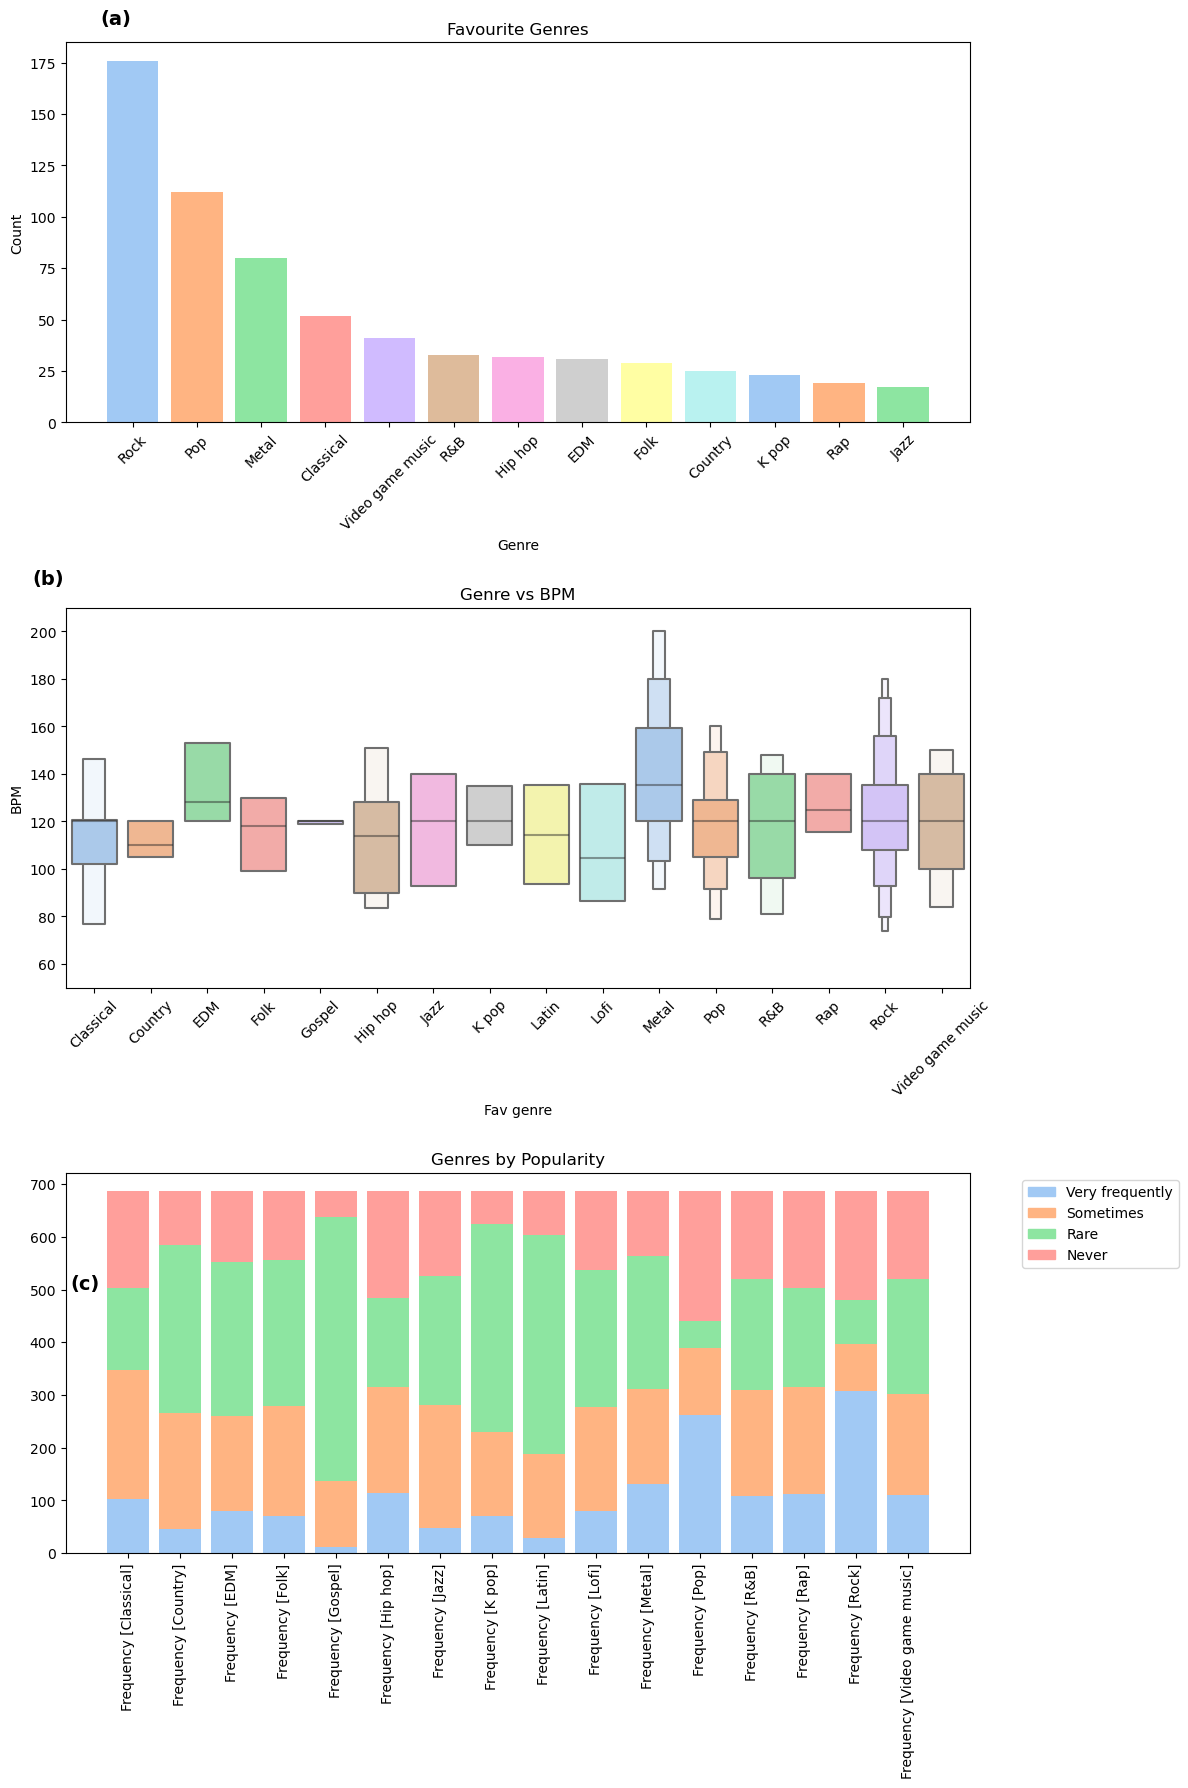

In [30]:
df_filtered_2 = df_filtered.copy()

#Top Genres
genre = df_filtered_2["Fav genre"].value_counts().loc[lambda x: x>10]

#Genre and BPM plot
df_sorted = df_filtered_2.sort_values("Fav genre")

#Listening Frequencies of Different Genres
genre_columns = df_filtered_2.columns[10:26]
r_dist, s_dist, n_dist, vf_dist = [], [], [], []
for col in genre_columns:
    freq_dist = df_filtered_2[col].value_counts().sort_index(ascending=True).tolist()
    r_dist.append(freq_dist[0])
    s_dist.append(freq_dist[1])
    n_dist.append(freq_dist[2])
    vf_dist.append(freq_dist[3])

#Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

#Subplot (a) - Top Genres as Bar Chart
axes[0].bar(genre.index, genre.values, color=sns.color_palette('pastel'))
axes[0].set_title('Favourite Genres')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Genre')
axes[0].tick_params(axis='x', rotation=45)
axes[0].text(-0.5, genre.max() * 1.1, '(a)', fontsize=14, fontweight='bold')

#Subplot (b) - Genre and BPM
sns.boxenplot(
    data=df_sorted,
    x="Fav genre", y="BPM", ax=axes[1],
    showfliers=False,
    palette="pastel"
)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_title('Genre vs BPM')
axes[1].set_ylim(50, 210)
axes[1].text(-1.1, 220, '(b)', fontsize=14, fontweight='bold')

#Subplot (c) - Listening Frequencies of Different Genres
colors = sns.color_palette('pastel')
for i, genre in enumerate(genre_columns):
    heights = [vf_dist[i], s_dist[i], r_dist[i], n_dist[i]]
    bottoms = [0, heights[0], heights[0] + heights[1], heights[0] + heights[1] + heights[2]]
    labels = ['Very frequently', 'Sometimes', 'Rare', 'Never']
    for j, (height, bottom) in enumerate(zip(heights, bottoms)):
        axes[2].bar(i, height, label=labels[j] if i == 0 else "", bottom=bottom, color=colors[j])
axes[2].set_title('Genres by Popularity')
axes[2].set_xticks(range(len(genre_columns)))
axes[2].set_xticklabels(genre_columns, rotation=90)
axes[2].legend(handles=[mpatches.Patch(color=colors[i], label=label) for i, label in enumerate(labels)], bbox_to_anchor=(1.05, 1.0), loc='upper left')
axes[2].text(-1.1, max(sum([vf_dist, s_dist, r_dist, n_dist], [])), '(c)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


Most listened genre is Rock.Pop,Metal,Classic follows next. Jazz is the least listened genre.

Rock is listened by nealy everyone.All  the other genres are moslt prefered by young individuals.

Metal music has the most wide range of BPM while Gospel music has the least.

## General Data

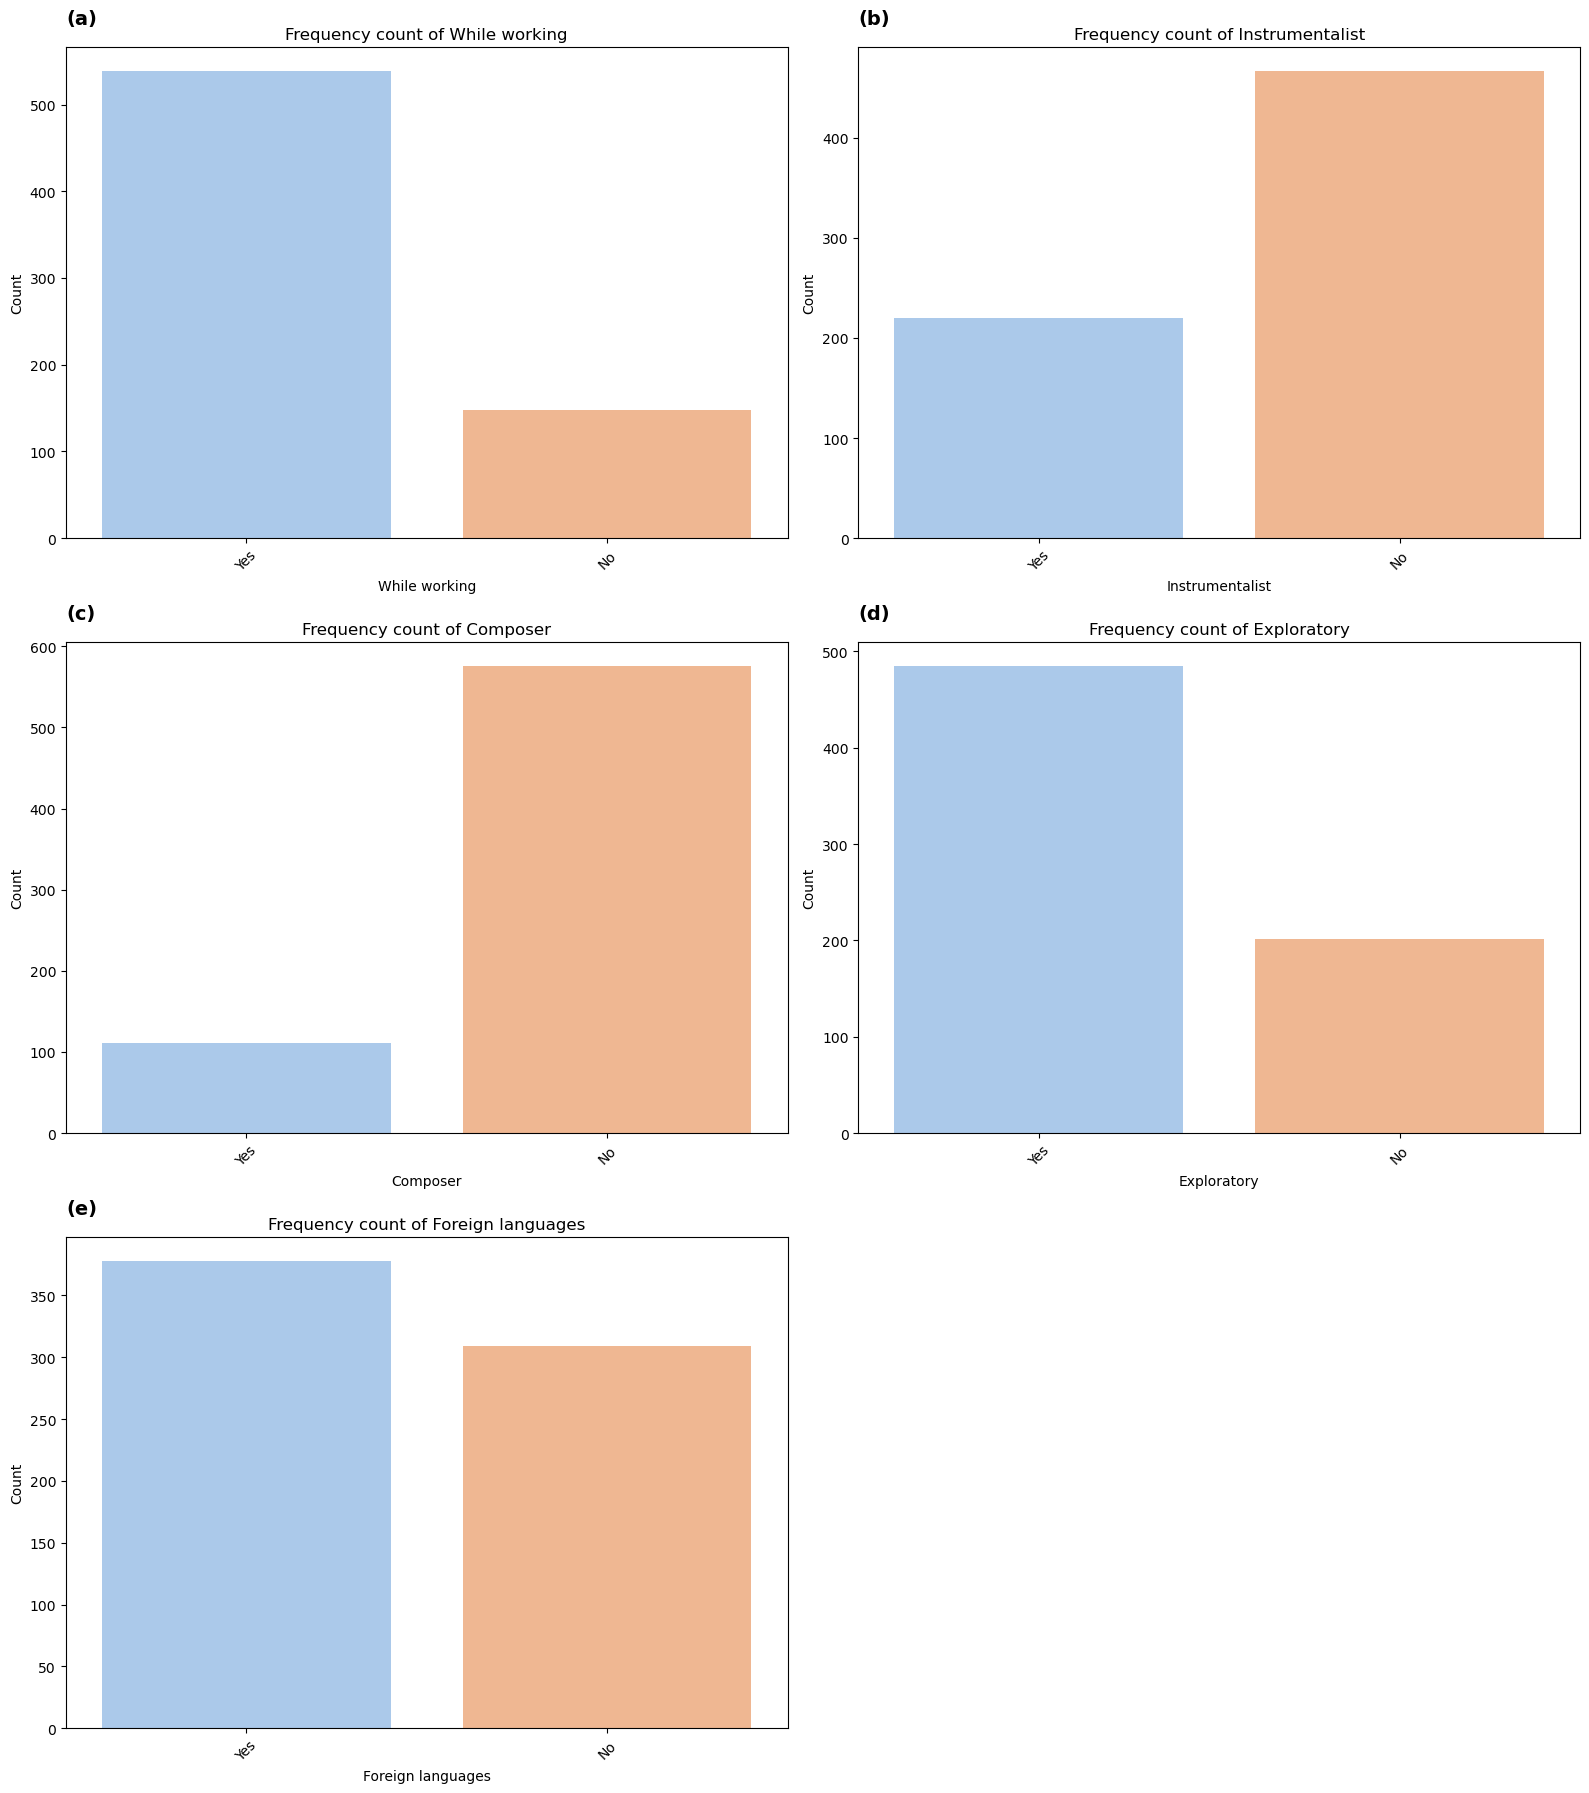

In [31]:
# General Data
gen_vars = ['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages']

#Define the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 18))

#Flatten the axes array for easy iteration
axes = axes.flatten()

#Plot each general variable
for i, col in enumerate(gen_vars):
    sns.countplot(x=col, data=df_filtered, palette='pastel', ax=axes[i])
    axes[i].set_title(f'Frequency count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].text(-0.5, max(df_filtered[col].value_counts()) * 1.1, f'({chr(97 + i)})', fontsize=14, fontweight='bold')

#Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Although most people have no musical background (Compose or play music), Majority explore new music and music in foreign languages.

## Mental Health

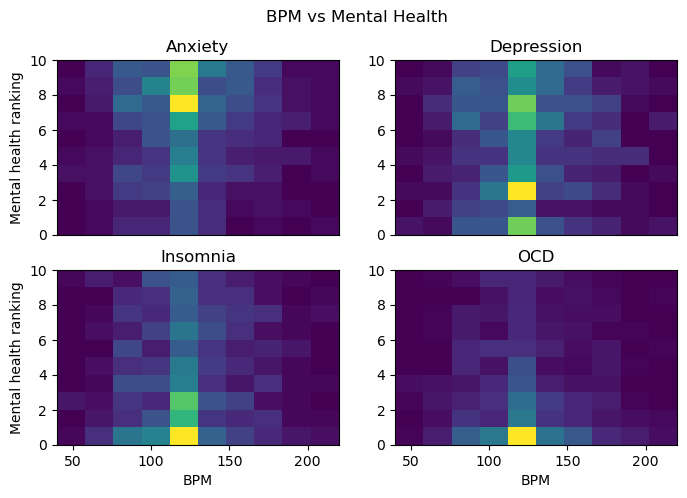

In [32]:
#BPM vs Health Conditions
fig = plt.figure(figsize=(8, 5))

plt.suptitle("BPM vs Mental Health")

y = df_filtered["Anxiety"]
y2 = df_filtered["Depression"]
y3 = df_filtered["Insomnia"]
y4 = df_filtered["OCD"]
x = df_filtered["BPM"]

ax = fig.add_subplot(221)
plt.title('Anxiety')
plt.xticks([])
plt.ylabel('Mental health ranking')
plt.hist2d(x,y, density = True);


ax = fig.add_subplot(222)
plt.title('Depression')
plt.xticks([])
plt.hist2d(x,y2, density = True);

ax = fig.add_subplot(223)
plt.title('Insomnia')
plt.ylabel('Mental health ranking')
plt.xlabel('BPM')
plt.hist2d(x,y3, density = True);

ax = fig.add_subplot(224)
plt.title('OCD')
plt.xlabel('BPM')
plt.hist2d(x,y4, density = True);

**No correlation**

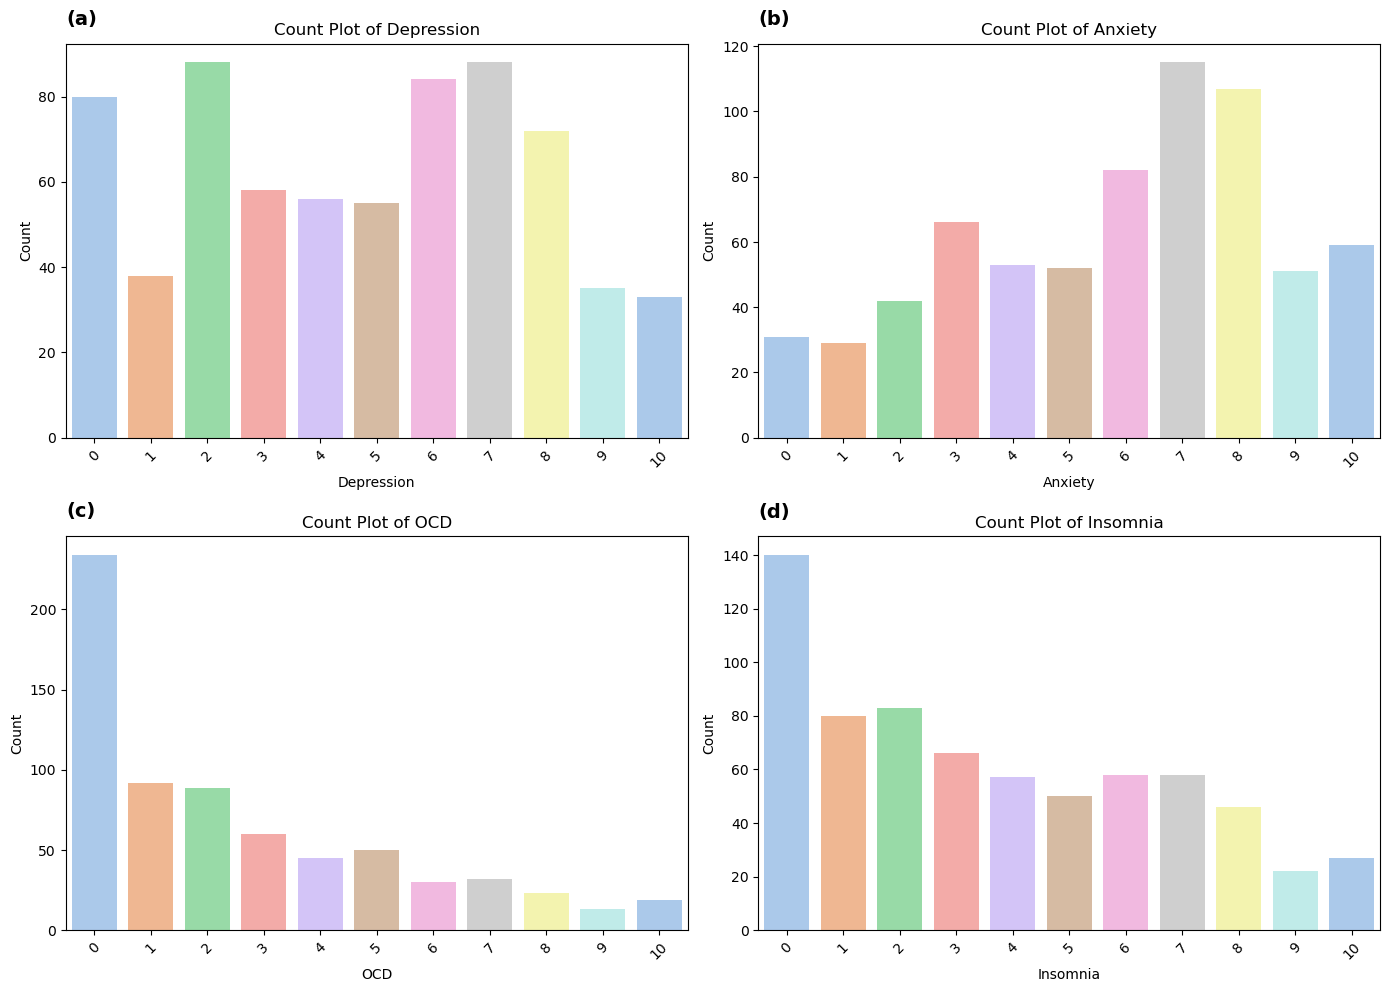

In [33]:
#Define the mental health conditions
mh = ['Depression', 'Anxiety', 'OCD', 'Insomnia']

#Set seaborn style and palette
colors = sns.color_palette('pastel')

#Define the number of rows and columns for the subplot grid
n_rows = 2
n_cols = 2

#Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))

#Flatten the axes array for easy iteration
axes = axes.flatten()

#Plot each mental health condition
for i, col in enumerate(mh):
    sns.countplot(x=df_filtered[col], palette=colors, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].text(-0.5, max(df_filtered[col].value_counts()) * 1.1, f'({chr(97 + i)})', fontsize=14, fontweight='bold')

#Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In the sample the Depression in Anxiety levels are higher when compared to OCD and Insomnia

### Favourite Genre with Mental Health

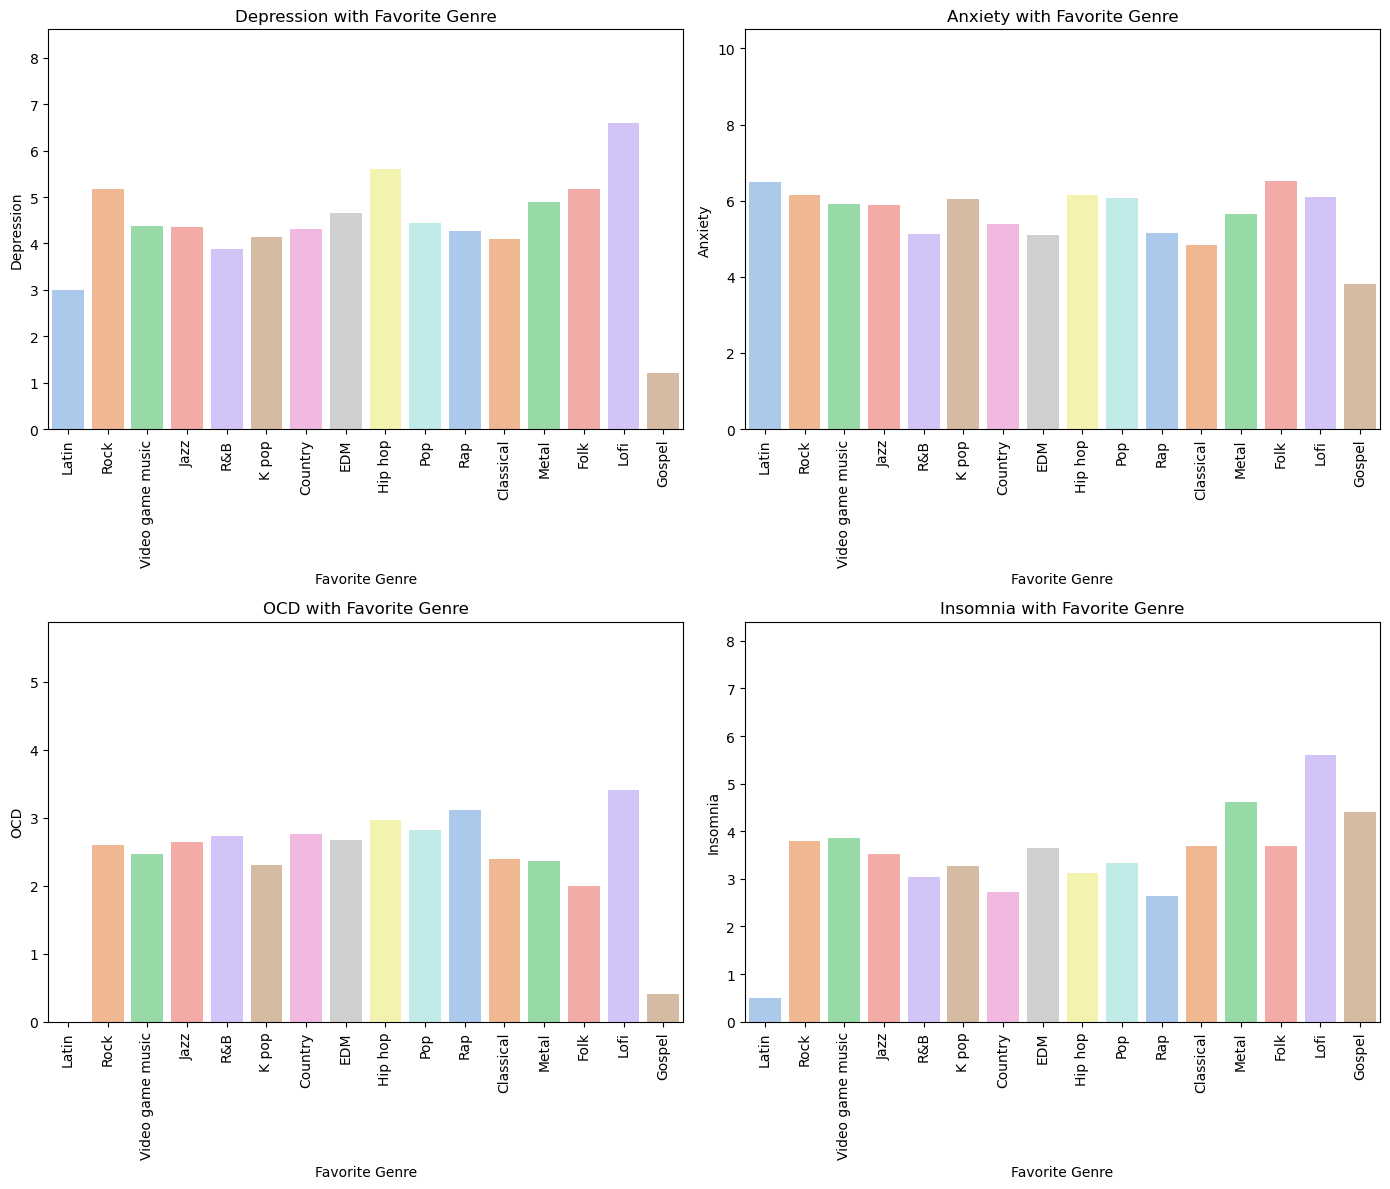

In [34]:
#Define the mental health conditions
mh = ['Depression', 'Anxiety', 'OCD', 'Insomnia']

#Set seaborn style and palette
colors = sns.color_palette('pastel')

#Define the number of rows and columns for the subplot grid
n_rows = 2
n_cols = 2

#Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 12))

#Flatten the axes array for easy iteration
axes = axes.flatten()

#Plot each mental health condition with favorite genre
for i, col in enumerate(mh):
    sns.barplot(x=df_filtered['Fav genre'], y=df_filtered[col], errwidth=0, palette=colors, ax=axes[i])
    axes[i].set_title(f'{col} with Favorite Genre')
    axes[i].set_xlabel('Favorite Genre')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=90)
    #axes[i].text(-0.5, max(df_filtered[col]) * 1.1, f'({chr(97 + i)})', fontsize=14, fontweight='bold')

#Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Listening Time and Mental Health

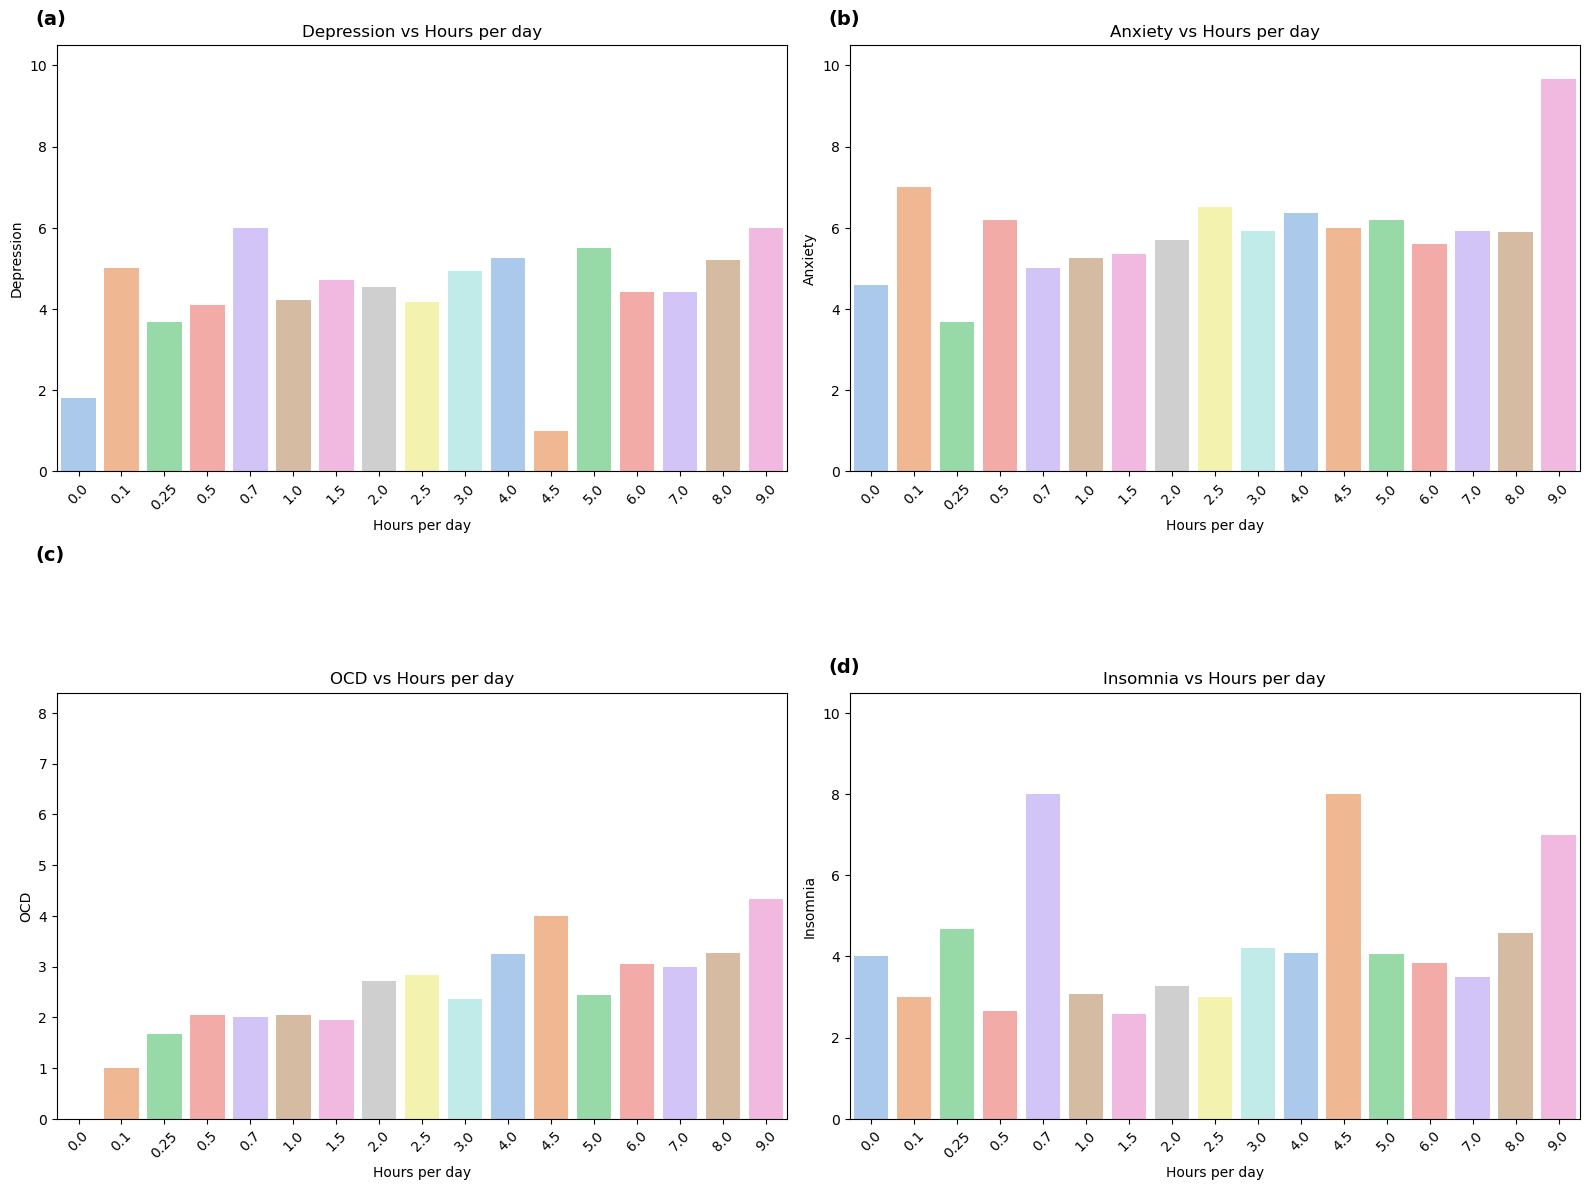

In [35]:
#Define the mental health conditions and set seaborn palette
mh = ['Depression', 'Anxiety', 'OCD', 'Insomnia']
colors = sns.color_palette('pastel')

#Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#Flatten the axes array for easy iteration
axes = axes.flatten()

#Plot each mental health condition against hours per day
for i, condition in enumerate(mh):
    order = df_filtered['Hours per day'].sort_values().unique()
    sns.barplot(x='Hours per day', y=condition, data=df_filtered, order=order, palette=colors, errwidth=0, ax=axes[i])
    axes[i].set_title(f'{condition} vs Hours per day')
    axes[i].set_xlabel('Hours per day')
    axes[i].set_ylabel(condition)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].text(-1, max(df_filtered[condition]) * 1.1, f'({chr(97 + i)})', fontsize=14, fontweight='bold')

#Remove any empty subplots
for j in range(i + 1, 4):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**No clear pattern**

**No clear Pattern**

### Musical Background and Mental Health

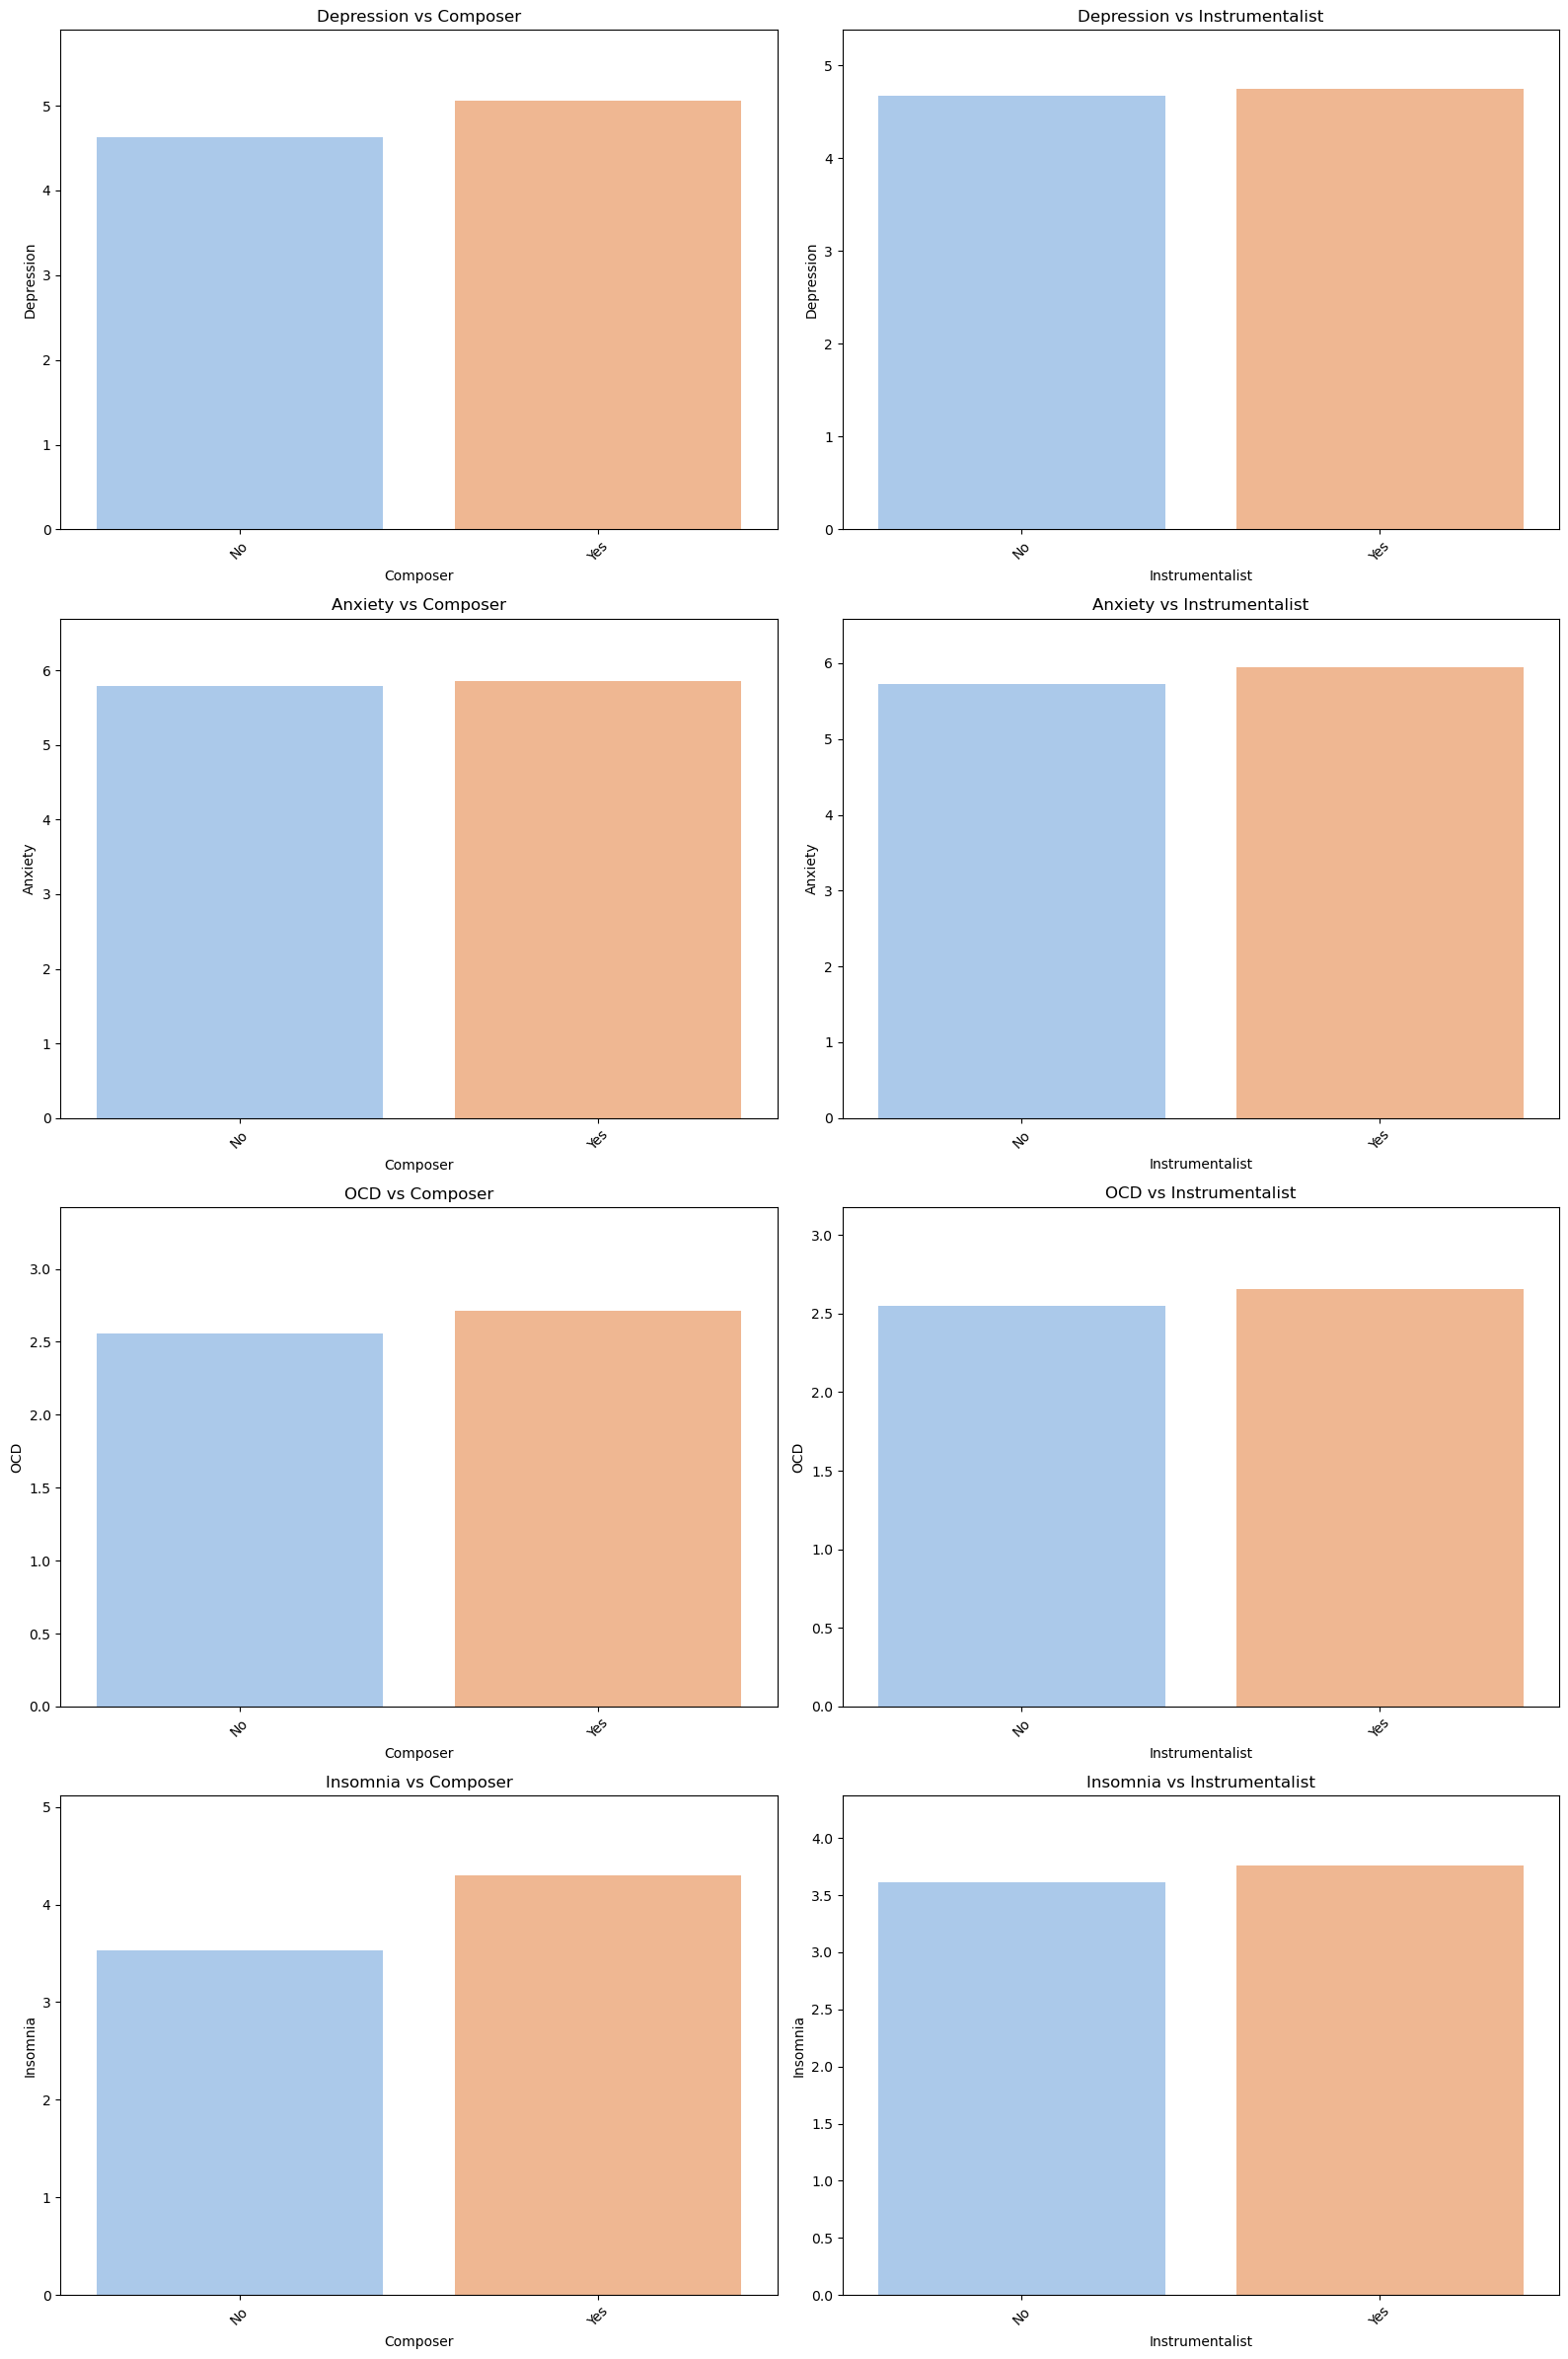

In [36]:
#Define the seaborn palette
colors = sns.color_palette('pastel')

#Define the mental health conditions
mh_conditions = ['Depression', 'Anxiety', 'OCD', 'Insomnia']

#Create subplots
fig, axes = plt.subplots(len(mh_conditions), 2, figsize=(16, 6 * len(mh_conditions)))

#Plot each mental health condition against Composer and Instrumentalist
for i, condition in enumerate(mh_conditions):
    #Plot against Composer
    order_composer = df_filtered['Composer'].sort_values().unique()
    sns.barplot(ax=axes[i, 0], x='Composer', y=condition, data=df_filtered, order=order_composer, palette=colors, errwidth=0)
    axes[i, 0].set_title(f'{condition} vs Composer')
    axes[i, 0].set_xlabel('Composer')
    axes[i, 0].set_ylabel(condition)
    axes[i, 0].tick_params(axis='x', rotation=45)

    #Plot against Instrumentalist
    order_instrumentalist = df_filtered['Instrumentalist'].sort_values().unique()
    sns.barplot(ax=axes[i, 1], x='Instrumentalist', y=condition, data=df_filtered, order=order_instrumentalist, palette=colors, errwidth=0)
    axes[i, 1].set_title(f'{condition} vs Instrumentalist')
    axes[i, 1].set_xlabel('Instrumentalist')
    axes[i, 1].set_ylabel(condition)
    axes[i, 1].tick_params(axis='x', rotation=45)

#Adjust layout
plt.tight_layout()

#Show plot
plt.show()


### Effects of Listening on Mental Health

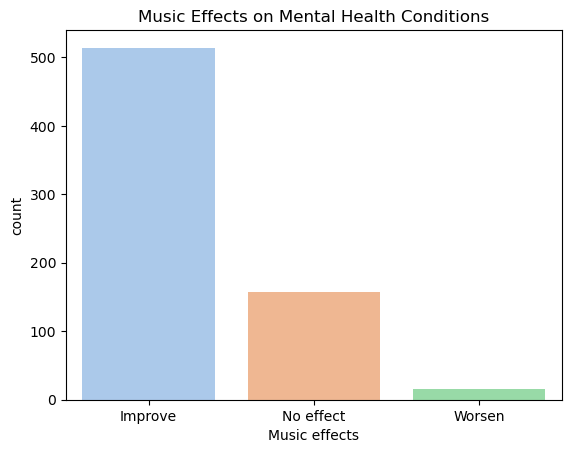

In [37]:
sns.countplot(x = "Music effects", data = df_filtered, palette=colors)
plt.title("Music Effects on Mental Health Conditions")
plt.show()

**Should Study about the respondants who had worsened condiotions**

#### Subset Analysis (Music Effects Worsen)

In [38]:
df_worsen = df_filtered[df_filtered['Music effects'] == 'Worsen']
df_worsen.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
15,17,Spotify,2.0,No,No,No,Pop,Yes,Yes,120,...,Very frequently,Rarely,Sometimes,Sometimes,Rarely,7,5,4,1,Worsen
64,32,Spotify,5.0,Yes,No,No,Rock,No,Yes,91,...,Very frequently,Very frequently,Rarely,Very frequently,Never,10,10,3,1,Worsen
127,13,Spotify,2.0,Yes,Yes,Yes,Rock,Yes,No,120,...,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,7,10,5,6,Worsen
150,21,Spotify,3.0,Yes,No,No,Pop,Yes,Yes,136,...,Very frequently,Very frequently,Very frequently,Sometimes,Sometimes,6,8,6,0,Worsen
244,31,Spotify,1.0,No,No,No,Rock,No,Yes,132,...,Rarely,Rarely,Rarely,Very frequently,Sometimes,3,10,0,0,Worsen


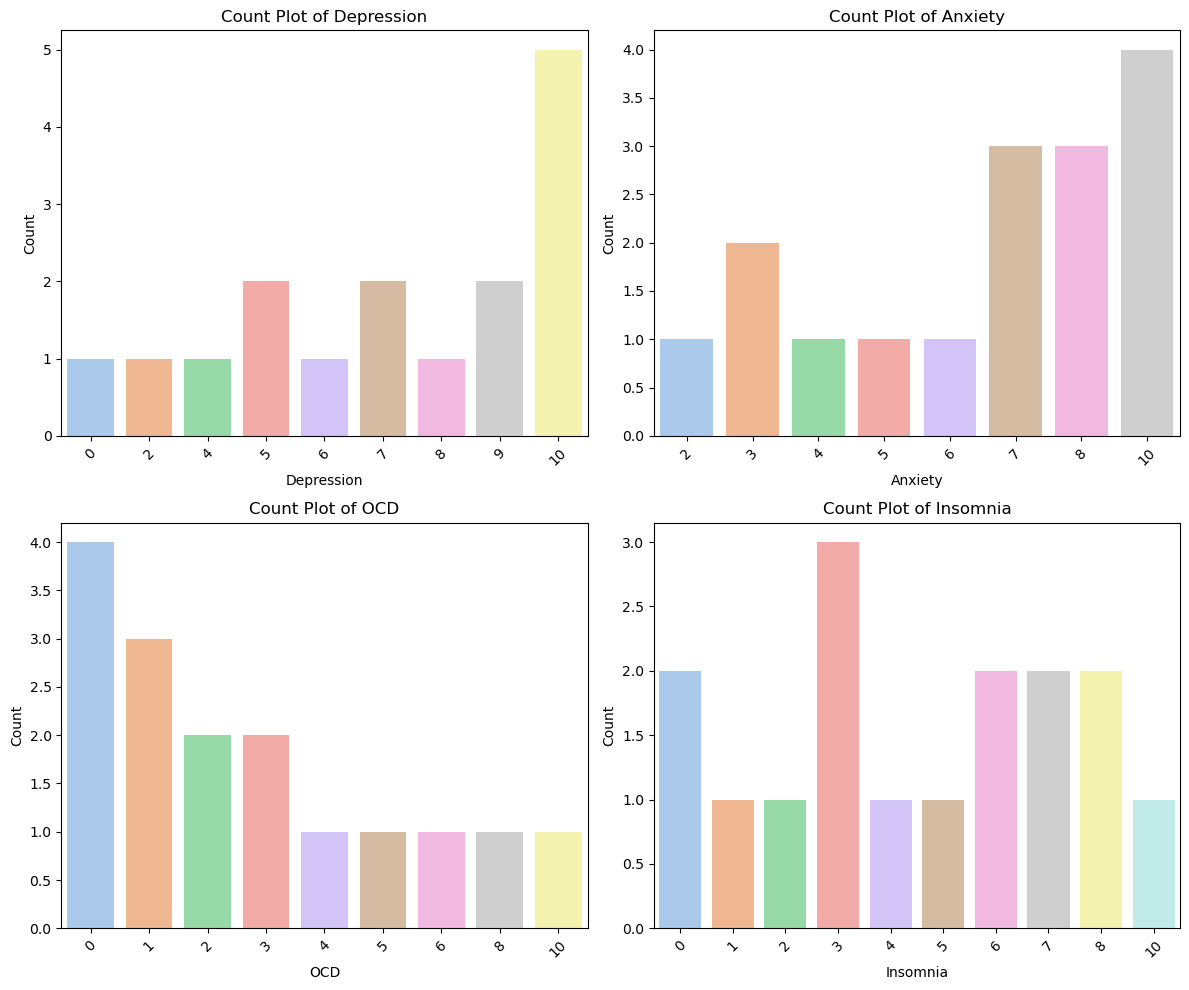

In [39]:
#Set seaborn style and palette
colors = sns.color_palette('pastel')

#Create a grid of subplots for each mental health condition
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

#Flatten axes for easier iteration
axes = axes.flatten()

#Create count plots for each mental health condition
for i, col in enumerate(mh):
    sns.countplot(x=df_worsen[col], palette=colors, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

#Adjust layout
plt.tight_layout()

#Show plot
plt.show()


**These respondents have extreme depression and anxiety**

#### Subset Analysis (Music Effects Improved)

In [40]:
df_improved = df_filtered[df_filtered['Music effects'] == 'Improve']
df_improved.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,Improve
1,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,119,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,Improve
3,61,YouTube,2.5,Yes,No,Yes,Jazz,Yes,Yes,84,...,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve
4,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,107,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve
5,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve


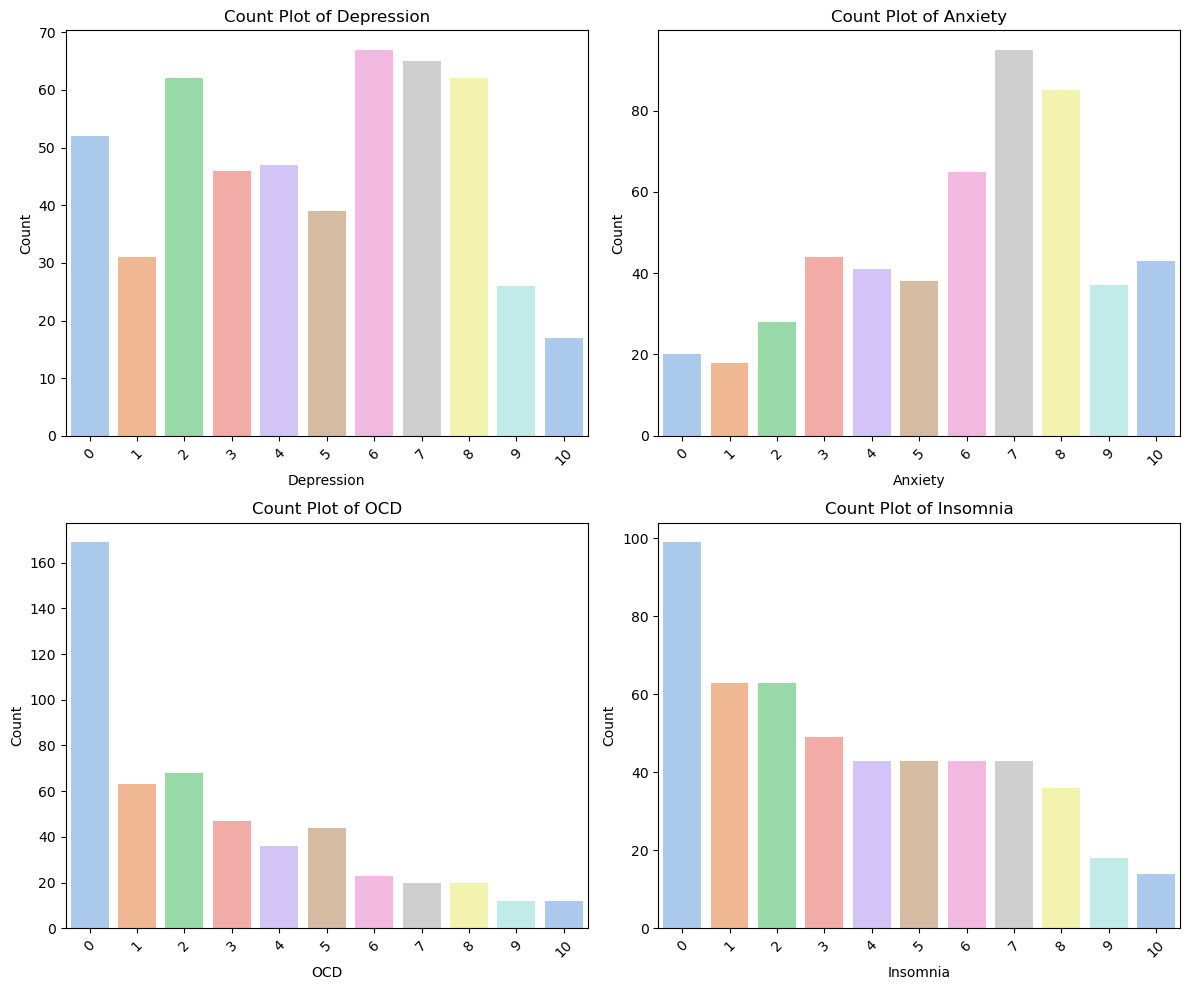

In [41]:
#Set seaborn style and palette
colors = sns.color_palette('pastel')

#Create a grid of subplots for each mental health condition
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

#Flatten axes for easier iteration
axes = axes.flatten()

#Create count plots for each mental health condition
for i, col in enumerate(mh):
    sns.countplot(x=df_improved[col], palette=colors, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

#Adjust layout
plt.tight_layout()

#Show plot
plt.show()


**This group have both extreme and general cases**

# MACHINE LEARNING

In [42]:
df_ml = df_filtered.copy()

## Random Forest Classifier (Model 1A)

In [43]:
import warnings
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


#Ignore warnings related to precision, recall, and F-score being ill-defined
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.metrics')


#Target variables
target_vars = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

#Define feature columns and target variables
num_cols = ['Age', 'BPM', 'Hours per day']
nom_cols = ['Primary streaming service', 'While working', 'Instrumentalist', 
            'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 
            'Music effects']
freq_cols = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 
             'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 
             'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 
             'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 
             'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 
             'Frequency [Video game music]']

#Variable Definition
X = df_ml.drop(target_vars, axis=1)
y = df_ml[target_vars]

# Initialize transformers
scaler = StandardScaler()
onehot = OneHotEncoder()
label = LabelEncoder()

#Scaling numeric columns (num_cols)
X[num_cols] = scaler.fit_transform(X[num_cols])

#Encoding ordinal columns (freq_cols)
for col in freq_cols:
    X[col] = label.fit_transform(X[col])

#One-hot encoding nominal columns (nom_cols)
X_nominal_encoded = pd.get_dummies(X[nom_cols], drop_first=True)
X = pd.concat([X.drop(columns=nom_cols), X_nominal_encoded], axis=1)

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

#Initialize a dictionary to hold models for each target variable
models = {}

#Train separate models for each target variable
for target_var in target_vars:
    #Define the model
    model = RandomForestClassifier(random_state=15)
    
    #Fit the model
    model.fit(X_train, y_train[target_var])

    #Store the model in the dictionary
    models[target_var] = model

#Evaluate each model
for target_var, model in models.items():
    y_pred = model.predict(X_test)
    
    #Evaluate using confusion matrix and classification report
    print(f"Target Variable: {target_var}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test[target_var], y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test[target_var], y_pred))


Target Variable: Anxiety
Confusion Matrix:
[[ 0  1  0  0  0  2  0  2  2  0  0]
 [ 0  1  0  1  0  0  1  2  1  0  0]
 [ 0  0  0  1  1  1  2  4  2  0  0]
 [ 0  0  0  0  0  2  2  7  4  0  0]
 [ 0  0  0  1  0  1  0  4  5  1  0]
 [ 0  0  0  0  0  1  0  8  1  0  0]
 [ 0  0  0  1  0  0  3  7  4  1  0]
 [ 0  0  0  0  1  0  2  5 10  0  0]
 [ 0  0  0  1  1  1  2 11  1  1  0]
 [ 0  0  0  1  0  1  1  5  5  0  0]
 [ 0  0  0  1  0  2  0  5  3  1  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.50      0.17      0.25         6
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00        12
           5       0.09      0.10      0.10        10
           6       0.23      0.19      0.21        16
           7       0.08      0.28      0.13        18
           8       0.03      0.06      0.04      

### Reasons for Low Accuracy

1. **Imbalanced Classes:**
   - Imbalanced classes occur when one class dominates the dataset, making it harder for the model to learn patterns in minority classes.
   - Biased predictions towards the majority class can lead to lower performance metrics for minority classes.

2. **Feature Selection and Engineering:**
   - The choice of features (columns) used to train the models significantly impacts model performance.
   - Missing important features or including irrelevant ones can reduce the model's ability to learn effectively.

3. **Model Complexity vs. Data Size:**
   - Complex models (e.g., RandomForest, XGBoost) might be too high in complexity relative to the size of your dataset.
   - Overfitting on the training data can occur, leading to poor generalization on the test set, especially with a smaller dataset.

4. **Hyperparameter Tuning:**
   - Hyperparameters (e.g., number of trees in RandomForest, learning rate in XGBoost) may not be optimized properly.
   - Further tuning or trying different sets of hyperparameters using techniques like GridSearchCV or randomized search could improve model performance.


## Binary Clustering (Using Median) to see Possible Clusters (Model 2A)

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

#Example of target variables
target_vars = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

#Define feature columns and target variables
num_cols = ['Age', 'BPM', 'Hours per day']
nom_cols = ['Primary streaming service', 'While working', 'Instrumentalist', 
            'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 
            'Music effects']
freq_cols = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 
             'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 
             'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 
             'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 
             'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 
             'Frequency [Video game music]']

#Separate X (features) and y (targets)
X = df_ml.drop(target_vars, axis=1)
y = df_ml[target_vars]

#Perform binary clustering for each target variable
for target_var in target_vars:
    #Define labels based on median (you can adjust this logic based on your data)
    median_value = y[target_var].median()
    y[target_var] = y[target_var].apply(lambda x: "High" if x >= median_value else "Low")

#Create a new DataFrame df_ml_2 with transformed target variables
df_ml_2 = pd.concat([X, y], axis=1)

# Preprocessing for numeric columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

#Preprocessing for nominal columns
X_nominal_encoded = pd.get_dummies(X[nom_cols], drop_first=True)
X = pd.concat([X.drop(columns=nom_cols), X_nominal_encoded], axis=1)

#Preprocessing for ordinal columns
label_encoder = LabelEncoder()
for col in freq_cols:
    X[col] = label_encoder.fit_transform(X[col])

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

#Initialize a dictionary to hold models for each target variable
models = {}

#Train separate models for each target variable
for target_var in target_vars:
    # Define the model
    model = RandomForestClassifier(random_state=15)
    
    # Fit the model
    model.fit(X_train, y_train[target_var])
    
    # Store the model in the dictionary
    models[target_var] = model

#Evaluate each model
for target_var, model in models.items():
    y_pred = model.predict(X_test)
    
    # Evaluate using confusion matrix and classification report
    print(f"Target Variable: {target_var}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test[target_var], y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test[target_var], y_pred))


C:\Users\venur\AppData\Local\Temp\ipykernel_12980\2657451322.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[target_var] = y[target_var].apply(lambda x: "High" if x >= median_value else "Low")


Target Variable: Anxiety
Confusion Matrix:
[[68  9]
 [49 12]]

Classification Report:
              precision    recall  f1-score   support

        High       0.58      0.88      0.70        77
         Low       0.57      0.20      0.29        61

    accuracy                           0.58       138
   macro avg       0.58      0.54      0.50       138
weighted avg       0.58      0.58      0.52       138

Target Variable: Depression
Confusion Matrix:
[[53 16]
 [42 27]]

Classification Report:
              precision    recall  f1-score   support

        High       0.56      0.77      0.65        69
         Low       0.63      0.39      0.48        69

    accuracy                           0.58       138
   macro avg       0.59      0.58      0.56       138
weighted avg       0.59      0.58      0.56       138

Target Variable: Insomnia
Confusion Matrix:
[[59 17]
 [51 11]]

Classification Report:
              precision    recall  f1-score   support

        High       0.54      

## Binary Clustering (KMeans) to see Possible Clusters (Model 2B)

D:\Anaconda3\envs\General_Analysis\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda3\envs\General_Analysis\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\venur\AppData\Local\Temp\ipykernel_12980\3378111115.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[target_var] = kmeans.fit_predict(y[[target_var]])
C:\Users\venur\AppData\Local\Temp\ipykernel_12

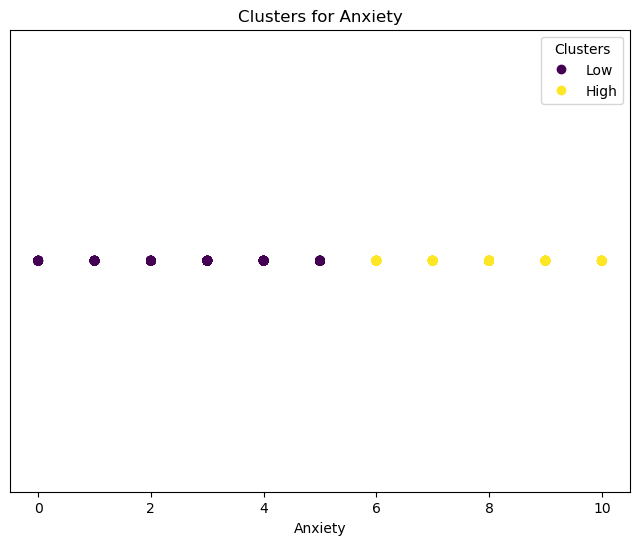

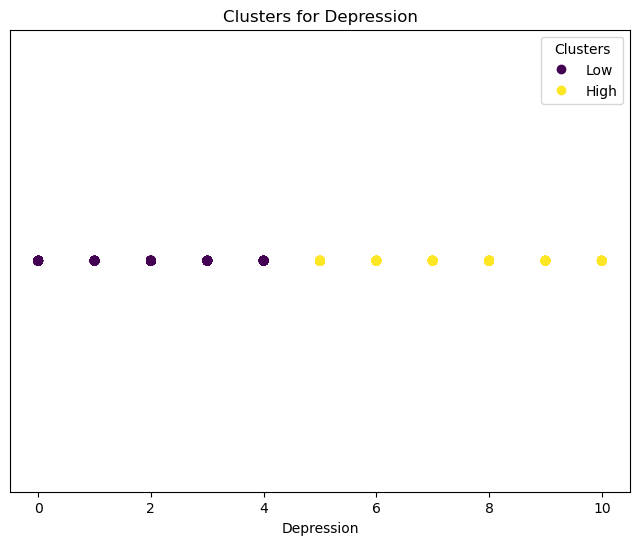

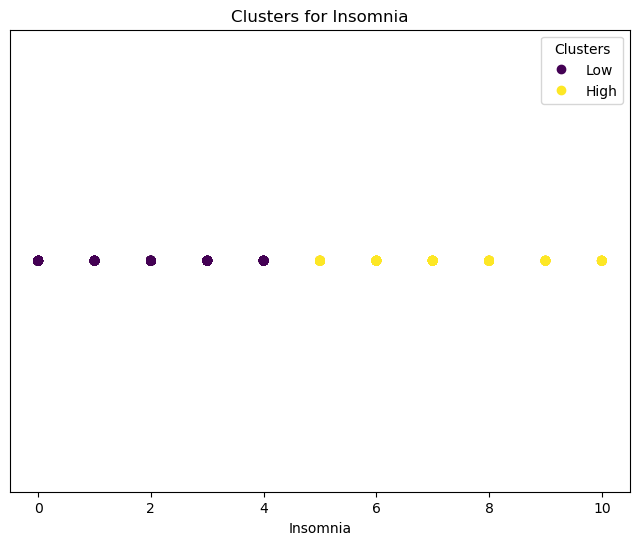

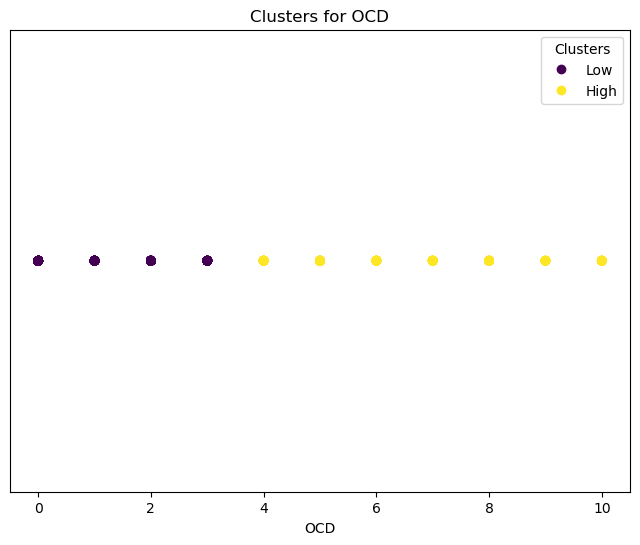

Target Variable: Anxiety
Confusion Matrix:
[[68  9]
 [49 12]]

Classification Report:
              precision    recall  f1-score   support

        High       0.58      0.88      0.70        77
         Low       0.57      0.20      0.29        61

    accuracy                           0.58       138
   macro avg       0.58      0.54      0.50       138
weighted avg       0.58      0.58      0.52       138

Target Variable: Depression
Confusion Matrix:
[[53 16]
 [42 27]]

Classification Report:
              precision    recall  f1-score   support

        High       0.56      0.77      0.65        69
         Low       0.63      0.39      0.48        69

    accuracy                           0.58       138
   macro avg       0.59      0.58      0.56       138
weighted avg       0.59      0.58      0.56       138

Target Variable: Insomnia
Confusion Matrix:
[[10 44]
 [ 7 77]]

Classification Report:
              precision    recall  f1-score   support

        High       0.59      

In [45]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Example of target variables
target_vars = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

#Assuming df_ml is your DataFrame containing the data
#Define feature columns and target variables
num_cols = ['Age', 'BPM', 'Hours per day']
nom_cols = ['Primary streaming service', 'While working', 'Instrumentalist', 
            'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 
            'Music effects']
freq_cols = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 
             'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 
             'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 
             'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 
             'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 
             'Frequency [Video game music]']

#Separate X (features) and y (targets)
X = df_ml.drop(target_vars, axis=1)
y = df_ml[target_vars]

#Perform k-means clustering for each target variable
for target_var in target_vars:
    #Initialize KMeans with 2 clusters (High and Low)
    kmeans = KMeans(n_clusters=2, random_state=15)
    y[target_var] = kmeans.fit_predict(y[[target_var]])

    #Map cluster labels to 'High' and 'Low'
    cluster_centers = kmeans.cluster_centers_
    y[target_var] = y[target_var].apply(lambda x: "High" if x == cluster_centers.argmax() else "Low")

#Create a new DataFrame df_ml_2 with transformed target variables
df_ml_2 = pd.concat([X, y], axis=1)

#Preprocessing for numeric columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

#Preprocessing for nominal columns
X_nominal_encoded = pd.get_dummies(X[nom_cols], drop_first=True)
X = pd.concat([X.drop(columns=nom_cols), X_nominal_encoded], axis=1)

#Preprocessing for ordinal columns
label_encoder = LabelEncoder()
for col in freq_cols:
    X[col] = label_encoder.fit_transform(X[col])

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

#Initialize a dictionary to hold models for each target variable
models = {}

#Train separate models for each target variable
for target_var in target_vars:
    #Define the model
    model = RandomForestClassifier(random_state=15)
    
    #Fit the model
    model.fit(X_train, y_train[target_var])
    
    #Store the model in the dictionary
    models[target_var] = model
    
    #Plot clusters
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(df_ml[target_var], np.zeros_like(df_ml[target_var]), c=y[target_var].map({'Low': 0, 'High': 1}), cmap='viridis', label=y[target_var].unique())
    plt.title(f'Clusters for {target_var}')
    plt.xlabel(target_var)
    plt.yticks([])
    handles, labels = scatter.legend_elements()
    plt.legend(handles, ['Low', 'High'], title="Clusters")
    plt.show()

#Evaluate each model
for target_var, model in models.items():
    y_pred = model.predict(X_test)
    
    #Evaluate using confusion matrix and classification report
    print(f"Target Variable: {target_var}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test[target_var], y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test[target_var], y_pred))


## Clustering (KMeans) to see Possible Clusters (Model 2C)

D:\Anaconda3\envs\General_Analysis\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda3\envs\General_Analysis\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Anaconda3\envs\General_Analysis\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda3\envs\General_Analysis\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

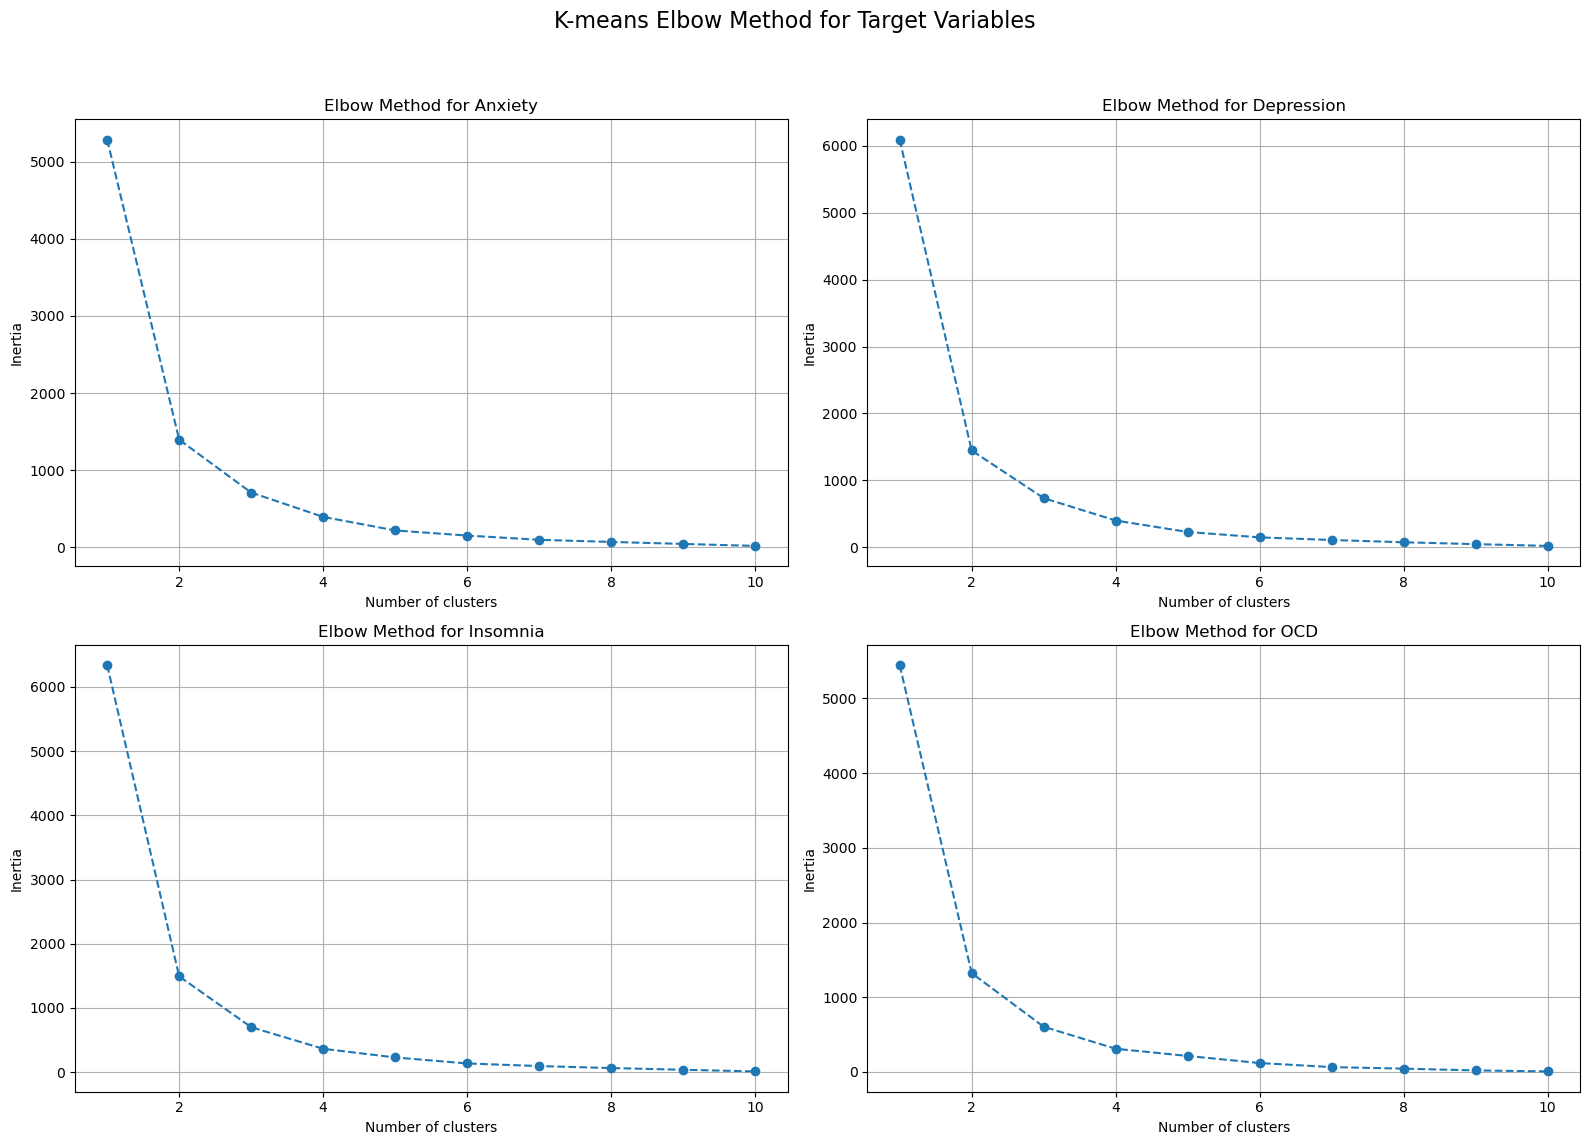

In [46]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Example of target variables
target_vars = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

#Assuming df_ml is your DataFrame containing the data
#Define feature columns and target variables
num_cols = ['Age', 'BPM', 'Hours per day']
nom_cols = ['Primary streaming service', 'While working', 'Instrumentalist', 
            'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 
            'Music effects']
freq_cols = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 
             'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 
             'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 
             'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 
             'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 
             'Frequency [Video game music]']

#Separate X (features) and y (targets)
X = df_ml.drop(target_vars, axis=1)
y = df_ml[target_vars]

#Function to determine optimal number of clusters using elbow method
def find_optimal_clusters(data, ax, target_var):
    inertias = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=15)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    #Plotting the elbow curve
    ax.plot(range(1, 11), inertias, marker='o', linestyle='--')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Inertia')
    ax.set_title(f'Elbow Method for {target_var}')
    ax.grid(True)

#Create subplots for each target variable in a grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('K-means Elbow Method for Target Variables', fontsize=16)

#Perform k-means clustering and plot elbow plots for each target variable
for idx, target_var in enumerate(target_vars):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    find_optimal_clusters(y[[target_var]], ax, target_var)

#Adjust layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

D:\Anaconda3\envs\General_Analysis\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda3\envs\General_Analysis\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\venur\AppData\Local\Temp\ipykernel_12980\832802929.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[target_var] = kmeans.fit_predict(y[[target_var]])
C:\Users\venur\AppData\Local\Temp\ipykernel_129

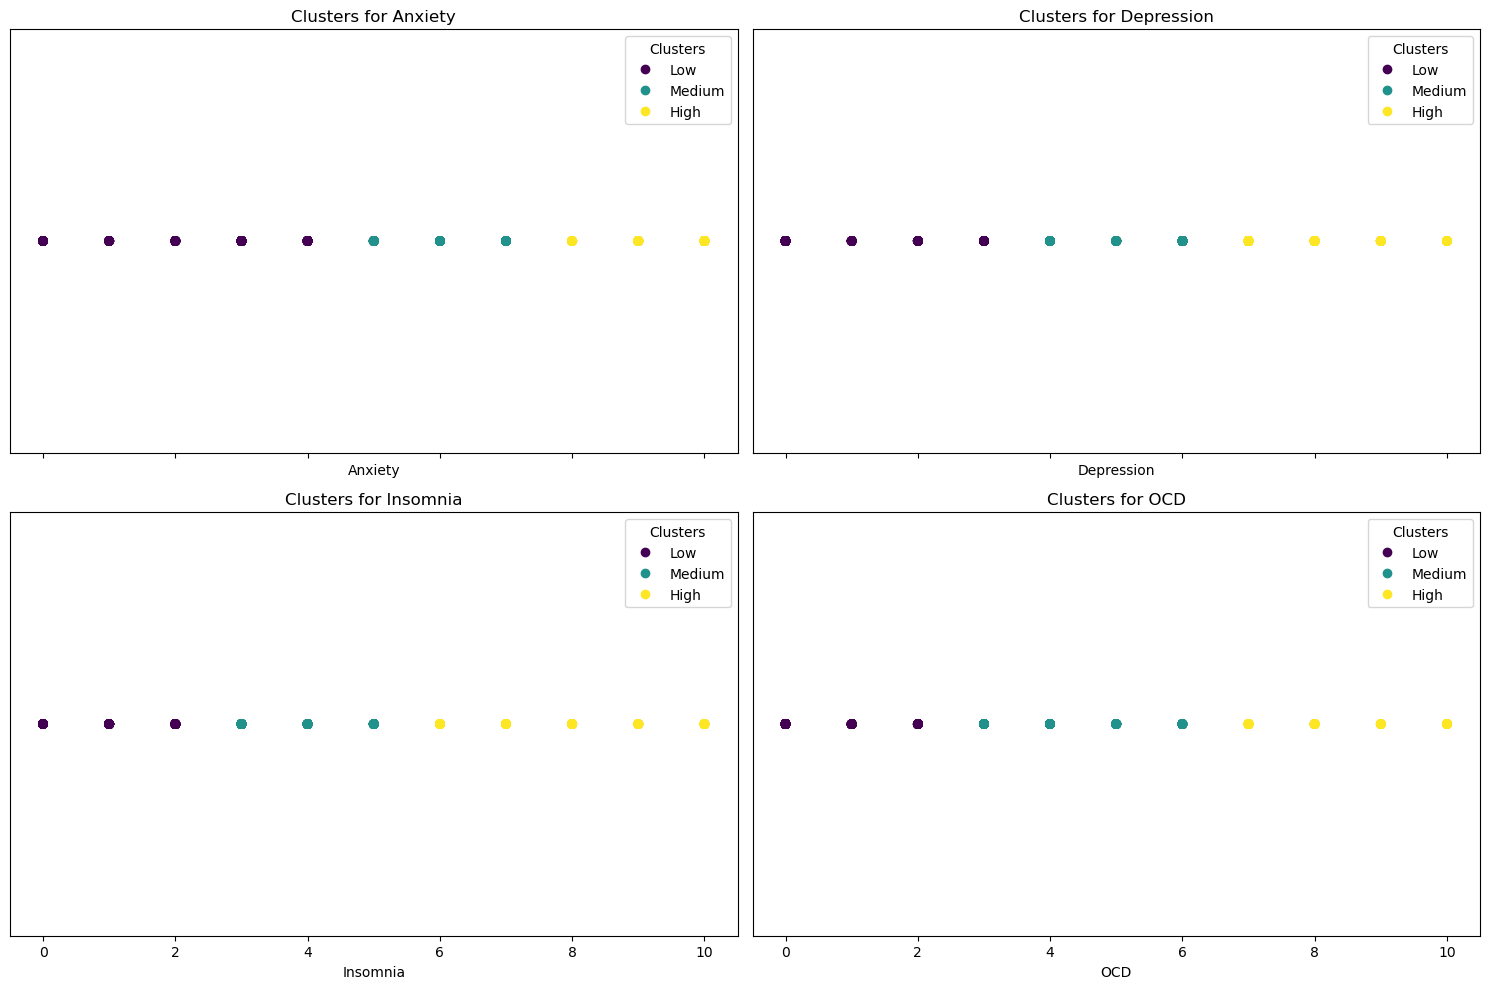

Target Variable: Anxiety
Confusion Matrix:
[[16  8 19]
 [11 19 21]
 [11  7 26]]

Classification Report:
              precision    recall  f1-score   support

        High       0.42      0.37      0.40        43
         Low       0.56      0.37      0.45        51
      Medium       0.39      0.59      0.47        44

    accuracy                           0.44       138
   macro avg       0.46      0.45      0.44       138
weighted avg       0.46      0.44      0.44       138

Target Variable: Depression
Confusion Matrix:
[[25  9  4]
 [20 33  4]
 [15 20  8]]

Classification Report:
              precision    recall  f1-score   support

        High       0.42      0.66      0.51        38
         Low       0.53      0.58      0.55        57
      Medium       0.50      0.19      0.27        43

    accuracy                           0.48       138
   macro avg       0.48      0.47      0.45       138
weighted avg       0.49      0.48      0.45       138

Target Variable: Insomnia
C

In [47]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Example of target variables
target_vars = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

#Assuming df_ml is your DataFrame containing the data
#Define feature columns and target variables
num_cols = ['Age', 'BPM', 'Hours per day']
nom_cols = ['Primary streaming service', 'While working', 'Instrumentalist', 
            'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 
            'Music effects']
freq_cols = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 
             'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 
             'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 
             'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 
             'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 
             'Frequency [Video game music]']

#Separate X (features) and y (targets)
X = df_ml.drop(target_vars, axis=1)
y = df_ml[target_vars]

#Function to map cluster labels to 'Low', 'Medium', 'High' based on centroids
def map_clusters_to_labels(kmeans, data):
    cluster_centers = kmeans.cluster_centers_.flatten()
    sorted_indices = np.argsort(cluster_centers)
    label_mapping = {sorted_indices[0]: 'Low', sorted_indices[1]: 'Medium', sorted_indices[2]: 'High'}
    return data.map(label_mapping)

#Create a grid layout for plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

for i, target_var in enumerate(target_vars):
    # Initialize KMeans with 3 clusters
    kmeans = KMeans(n_clusters=3, random_state=15)
    y[target_var] = kmeans.fit_predict(y[[target_var]])

    # Map cluster labels to 'Low', 'Medium', and 'High' based on centroids
    y[target_var] = map_clusters_to_labels(kmeans, y[target_var])

    # Plot clusters
    row, col = divmod(i, 2)
    scatter = axs[row, col].scatter(df_ml[target_var], np.zeros_like(df_ml[target_var]), c=y[target_var].map({'Low': 0, 'Medium': 1, 'High': 2}), cmap='viridis', label=y[target_var].unique())
    axs[row, col].set_title(f'Clusters for {target_var}')
    axs[row, col].set_xlabel(target_var)
    axs[row, col].set_yticks([])
    handles, labels = scatter.legend_elements()
    axs[row, col].legend(handles, ['Low', 'Medium', 'High'], title="Clusters")

plt.tight_layout()
plt.show()

#Create a new DataFrame df_ml_2 with transformed target variables
df_ml_2 = pd.concat([X, y], axis=1)

#Preprocessing for numeric columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

#Preprocessing for nominal columns
X_nominal_encoded = pd.get_dummies(X[nom_cols], drop_first=True)
X = pd.concat([X.drop(columns=nom_cols), X_nominal_encoded], axis=1)

#Preprocessing for ordinal columns
label_encoder = LabelEncoder()
for col in freq_cols:
    X[col] = label_encoder.fit_transform(X[col])

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

#Initialize a dictionary to hold models for each target variable
models = {}

#Train separate models for each target variable
for target_var in target_vars:
    # Define the model
    model = RandomForestClassifier(random_state=15)
    
    # Fit the model
    model.fit(X_train, y_train[target_var])
    
    # Store the model in the dictionary
    models[target_var] = model

#Evaluate each model
for target_var, model in models.items():
    y_pred = model.predict(X_test)
    
    #Evaluate using confusion matrix and classification report
    print(f"Target Variable: {target_var}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test[target_var], y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test[target_var], y_pred))


**Binary Clustering with Kmeans gives the best results so far**

## Improving Model 2B

In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
import pandas as pd

#Example of target variables
target_vars = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

#Assuming df_ml is your DataFrame containing the data
#Define feature columns and target variables
num_cols = ['Age', 'BPM', 'Hours per day']
nom_cols = ['Primary streaming service', 'While working', 'Instrumentalist', 
            'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 
            'Music effects']
freq_cols = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 
             'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 
             'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 
             'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 
             'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 
             'Frequency [Video game music]']

#Separate X (features) and y (targets)
X = df_ml.drop(target_vars, axis=1)
y = df_ml[target_vars]

#Perform k-means clustering for each target variable
for target_var in target_vars:
    # Initialize KMeans with 2 clusters (High and Low)
    kmeans = KMeans(n_clusters=2, random_state=15)
    y[target_var] = kmeans.fit_predict(y[[target_var]])

    # Map cluster labels to 'High' and 'Low'
    cluster_centers = kmeans.cluster_centers_
    y[target_var] = y[target_var].apply(lambda x: "High" if x == cluster_centers.argmax() else "Low")

#Create a new DataFrame df_ml_2 with transformed target variables
df_ml_2 = pd.concat([X, y], axis=1)

#Preprocessing for numeric columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

#Preprocessing for nominal columns
X_nominal_encoded = pd.get_dummies(X[nom_cols], drop_first=True)
X = pd.concat([X.drop(columns=nom_cols), X_nominal_encoded], axis=1)

#Preprocessing for ordinal columns
label_encoder = LabelEncoder()
for col in freq_cols:
    X[col] = label_encoder.fit_transform(X[col])

#Initialize a dictionary to hold models and their cross-validation scores
models = {}

#Define a parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Train and cross-validate separate models for each target variable
for target_var in target_vars:
    #Define the model
    model = RandomForestClassifier(random_state=15)
    
    # erform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X, y[target_var])
    
    #Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_
    
    #Store the best model in the dictionary
    models[target_var] = best_model
    
    #Print the best parameters and the best cross-validation score
    print(f"Best parameters for {target_var}: {grid_search.best_params_}")
    print(f"Best CV accuracy for {target_var}: {grid_search.best_score_:.4f}\n")

#Print confusion matrices for each target variable
for target_var, model in models.items():
    # Split data into training and testing sets based on the best model's target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y[target_var], test_size=0.2, random_state=15)
    
    # Fit the best model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the test data using the best model
    y_pred = model.predict(X_test)
    
    # Print confusion matrix and classification report
    print(f"Target Variable: {target_var}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-----------------------------------------------------\n")


D:\Anaconda3\envs\General_Analysis\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda3\envs\General_Analysis\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\venur\AppData\Local\Temp\ipykernel_12980\130519847.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[target_var] = kmeans.fit_predict(y[[target_var]])
C:\Users\venur\AppData\Local\Temp\ipykernel_129

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Anxiety: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV accuracy for Anxiety: 0.6114

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Depression: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Best CV accuracy for Depression: 0.6128

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Insomnia: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV accuracy for Insomnia: 0.6274

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for OCD: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best CV accuracy for OCD: 0.6958

Target Variable: Anxiety
Confusion Matrix:
[[69  8]
 [50 11]]

Classification Report:
              precision    recall  f1-score   support

Interpretation:

- **Accuracy:** Accuracy measures the proportion of correct predictions (both true positives and true negatives) out of all predictions made.

- **Precision:** Precision measures the proportion of true positive predictions out of all positive predictions made by the model. For the "Low" category, precision is 65%, indicating that when the model predicts an instance as "Low," it is correct 65% of the time.

- **Recall:** Recall (or sensitivity) measures the proportion of true positives that are correctly identified by the model out of all actual positives. For the "Low" category, recall is 100%, indicating that the model identifies 100% of actual "Low" cases.

- **F1-score:** The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both measures. The weighted average F1-score is 0.51, reflecting the model's ability to balance precision and recall considering the class imbalance.

- **Macro average:** The macro average F1-score (0.39) and precision (0.33) represent the unweighted average of F1-scores and precision across both classes ("High" and "Low"). It indicates lower performance overall, influenced by challenges in predicting the minority class ("High").

- **Weighted average:** The weighted average F1-score (0.51) and precision (0.43) give more weight to the "Low" class due to its higher number of instances, providing a balanced evaluation metric considering the class distribution.


## Reducing classes of Frequency Cols

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Example of target variables
target_vars = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

#Assuming df_ml is your DataFrame containing the data
#Define feature columns and target variables
num_cols = ['Age', 'BPM', 'Hours per day']
nom_cols = ['Primary streaming service', 'While working', 'Instrumentalist', 
            'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 
            'Music effects']
freq_cols = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 
             'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 
             'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 
             'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 
             'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 
             'Frequency [Video game music]']

#Separate X (features) and y (targets)
X = df_ml.drop(target_vars, axis=1)
y = df_ml[target_vars]

#Function to map 'Never' and 'Rarely' to 'Rarely'
def map_freq_cols(data):
    # Define the mapping for 'Never' and 'Rarely'
    mapping = {'Never': 'Rarely', 'Rarely': 'Rarely'}
    # Apply mapping to each column in freq_cols
    for col in freq_cols:
        data[col] = data[col].map(mapping).fillna(data[col])
    return data

#Apply mapping to freq_cols
X = map_freq_cols(X)

# Function to map cluster labels to 'Low', 'Medium', 'High' based on centroids
def map_clusters_to_labels(kmeans, data):
    cluster_centers = kmeans.cluster_centers_.flatten()
    sorted_indices = np.argsort(cluster_centers)
    label_mapping = {sorted_indices[0]: 'Low', sorted_indices[1]: 'Medium', sorted_indices[2]: 'High'}
    return data.map(label_mapping)

#Create a new DataFrame df_ml_2 with transformed target variables
df_ml_2 = pd.concat([X, y], axis=1)

#Preprocessing for numeric columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

#Preprocessing for nominal columns
X_nominal_encoded = pd.get_dummies(X[nom_cols], drop_first=True)
X = pd.concat([X.drop(columns=nom_cols), X_nominal_encoded], axis=1)

#Preprocessing for ordinal columns (already mapped freq_cols)
label_encoder = LabelEncoder()
for col in freq_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Initialize a dictionary to hold models for each target variable
models = {}

#Train separate models for each target variable
for target_var in target_vars:
    # Initialize KMeans with 3 clusters
    kmeans = KMeans(n_clusters=3, random_state=15)
    y[target_var] = kmeans.fit_predict(y[[target_var]])

    # Map cluster labels to 'Low', 'Medium', and 'High' based on centroids
    y[target_var] = map_clusters_to_labels(kmeans, y[target_var])

    # Define the model
    model = RandomForestClassifier(random_state=15)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y[target_var], test_size=0.2, random_state=15)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Store the model in the dictionary
    models[target_var] = model

#Evaluate each model
for target_var, model in models.items():
    y_pred = model.predict(X_test)
    
    # Evaluate using confusion matrix and classification report
    print(f"Target Variable: {target_var}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


In [ ]:
X['Frequency [Classical]'].unique()